<a href="https://colab.research.google.com/github/BrendaLoznik/waterpumps/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Housekeeping

### 1.1 Load libraries

In [ ]:
pip install folium

In [ ]:
#basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium

In [ ]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 200)

### 1.2 Custom functions

In [ ]:
#custom function that creates a numerical data quality report
def numerical_dqr(df):
  
  #select numerical columns
  numerical = df.select_dtypes(include = ['int', 'Int64', 'float']).columns.tolist()
  
  #data type
  data_types = pd.DataFrame(
    df[numerical].dtypes,
    columns=['Data Type'])
  
  #missing data
  missing_data = pd.DataFrame(
    df[numerical].isnull().sum(),
    columns=['Missing Values'])
  
  #unique values
  unique_values = pd.DataFrame(
    columns=['Unique Values'])
  for row in list(df[numerical].columns.values):
    unique_values.loc[row] = [df[numerical][row].nunique()]
    
    #number of records
  count_values = pd.DataFrame(
    columns=['Records'])
  for row in list(df[numerical].columns.values):
      count_values.loc[row] = [df[numerical][row].count()]
    
    #minimum value
  maximum_values = pd.DataFrame(
    columns=['Maximum Value'])
  for row in list(df[numerical].columns.values):
      maximum_values.loc[row] = [df[numerical][row].max()]
    
  #maximum value
  minimum_values = pd.DataFrame(
    columns=['Minimum Value'])
  for row in list(df[numerical].columns.values):
      minimum_values.loc[row] = [df[numerical][row].min()]
    
  #mean value
  mean_values = pd.DataFrame(
    columns=['Mean Value'])
  for row in list(df[numerical].columns.values):
      mean_values.loc[row] = [df[numerical][row].mean()]
    
  #first quartile
  quartile_1 = pd.DataFrame(
    columns=['1st Quartile'])
  for row in list(df[numerical].columns.values):
      quartile_1.loc[row] = [df[numerical][row].quantile(0.25)]
    
  #median
  median = pd.DataFrame(
  columns=['Median'])
  for row in list(df[numerical].columns.values):
    median.loc[row] = [df[numerical][row].quantile(0.5)]
    
  #third quartile
  quartile_3 = pd.DataFrame(
    columns=['3rd Quartile'])
  for row in list(df[numerical].columns.values):
    quartile_3.loc[row] = [df[numerical][row].quantile(0.75)]
    
  #join columns 
  dq_report_num = data_types.join(count_values).join(missing_data).join(unique_values).join(minimum_values).join(maximum_values).join(mean_values).join(quartile_1).join(median).join(quartile_3)
  
  #percentage missing
  dq_report_num['Missing %'] = (dq_report_num['Missing Values'] / len(df[numerical]) *100)
  
  # change order of columns
  dq_report_num = dq_report_num[['Data Type', 'Records', 'Unique Values', 'Missing Values', 'Missing %', 'Mean Value', 'Minimum Value', '1st Quartile', 'Median', '3rd Quartile', 'Maximum Value', ]]

  #round
  dq_report_num[['Missing %', 'Mean Value', 'Minimum Value', '1st Quartile', 'Median', '3rd Quartile', 'Maximum Value']] =   dq_report_num[['Missing %', 'Mean Value', 'Minimum Value', '1st Quartile', 'Median', '3rd Quartile', 'Maximum Value']].round(1)
  
   
  #rreturn report
  return(dq_report_num)

In [ ]:
def categorical_dqr(df):

  #select categorical columns
  categorical = df.select_dtypes(include = 'object').columns.tolist()

  #datatype
  data_types = pd.DataFrame(
    df[categorical].dtypes,
    columns=['Data Type'])
  
  #count
  count_values = pd.DataFrame(
      columns=['Records'])
  for row in list(raw[categorical].columns.values):
    count_values.loc[row] = [raw[categorical][row].count()]
  
   #missing data
  missing_data = pd.DataFrame(
    df[categorical].isnull().sum(),
    columns=['Missing Values'])
  
  #unique values
  unique_values = pd.DataFrame(
      columns=['Unique Values'])
  for row in list(raw[categorical].columns.values):
    unique_values.loc[row] = [raw[categorical][row].nunique()]

  #mode
  mode_values = pd.DataFrame(
      columns=['Mode'])
  for row in list(raw[categorical].columns.values): 
    mode_values.loc[row] = [raw[categorical][row].mode()[0]]
    mode = mode_values.loc[row]
  
  #mode frequency
  listModeFreq = []
  for row in categorical:
    mode = raw[row].mode().iat[0]
    ModeFreq = raw[row].value_counts()[mode]
    #print(x, mode, raw[x].value_counts()[mode])
    listModeFreq .append(ModeFreq )
  listModeFreq  = np.array(listModeFreq )
    
  
   #create data quality report
  dq_report_cat = data_types.join(missing_data).join(count_values).join(unique_values).join(mode_values)
  dq_report_cat['Mode freq.'] = listModeFreq 
  dq_report_cat['Mode %'] = (dq_report_cat['Mode freq.'] / dq_report_cat['Records']*100) .astype('float')
  dq_report_cat['Missing %'] = (dq_report_cat['Missing Values'] / len(raw[categorical]) *100)

  #change order of columns
  dq_report_cat = dq_report_cat[['Data Type', 'Records', 'Unique Values', 'Missing Values', 'Missing %', 'Mode', 'Mode freq.', 'Mode %']]
  dq_report_cat[['Missing %', 'Mode %']] =   dq_report_cat[['Missing %'	,  'Mode %']].round(1  )

  #return report
  return(dq_report_cat)

In [ ]:
#custom function that creates a numerical data quality report
def datetime_dqr(df):
  
  #select numerical columns
  date = df.select_dtypes(include = ['datetime64[ns]']).columns.tolist()
  
  #data type
  data_types = pd.DataFrame(
    df[date].dtypes,
    columns=['Data Type'])
  
  #missing data
  missing_data = pd.DataFrame(
    df[date].isnull().sum(),
    columns=['Missing Values'])
  
  #unique values
  unique_values = pd.DataFrame(
    columns=['Unique Values'])
  for row in list(df[date].columns.values):
    unique_values.loc[row] = [df[date][row].nunique()]
    
    #number of records
  count_values = pd.DataFrame(
    columns=['Records'])
  for row in list(df[date].columns.values):
      count_values.loc[row] = [df[date][row].count()]
    
    #minimum value
  maximum_values = pd.DataFrame(
    columns=['Maximum Value'])
  for row in list(df[date].columns.values):
      maximum_values.loc[row] = [df[date][row].max()]
    
  #maximum value
  minimum_values = pd.DataFrame(
    columns=['Minimum Value'])
  for row in list(df[date].columns.values):
      minimum_values.loc[row] = [df[date][row].min()]
    
  #mean value
  mean_values = pd.DataFrame(
    columns=['Mean Value'])
  for row in list(df[date].columns.values):
      mean_values.loc[row] = [df[date][row].mean()]
    
  #first quartile
  quartile_1 = pd.DataFrame(
    columns=['1st Quartile'])
  for row in list(df[date].columns.values):
      quartile_1.loc[row] = [df[date][row].quantile(0.25)]
    
  #median
  median = pd.DataFrame(
  columns=['Median'])
  for row in list(df[date].columns.values):
    median.loc[row] = [df[date][row].quantile(0.5)]
    
  #third quartile
  quartile_3 = pd.DataFrame(
    columns=['3rd Quartile'])
  for row in list(df[date].columns.values):
    quartile_3.loc[row] = [df[date][row].quantile(0.75)]
    
  #join columns 
  dq_report_date = data_types.join(count_values).join(missing_data).join(unique_values).join(minimum_values).join(maximum_values).join(mean_values).join(quartile_1).join(median).join(quartile_3)
  
  #percentage missing
  dq_report_date['Missing %'] = (dq_report_date['Missing Values'] / len(df[date]) *100)
  
  # change order of columns
  dq_report_date = dq_report_date[['Data Type', 'Records', 'Unique Values', 'Missing Values', 'Missing %', 'Mean Value', 'Minimum Value', '1st Quartile', 'Median', '3rd Quartile', 'Maximum Value', ]]
   
  #round   
  dq_report_date['Mean Value'] = dq_report_date['Mean Value'].dt.date
  dq_report_date['Missing %'] = dq_report_date['Missing %'].round(1)

    
  #rreturn report
  return(dq_report_date)

In [ ]:
#custome duplicate checker
def duplicate_checker(df):
  duplicates = df.duplicated(keep = 'first').sum()
  print("Number of duplicates: {}".format(duplicates))
  print("Total number of records: {}".format(len(df)))
  print("Percentage duplicated: {}".format((duplicates/len(df))*100))

In [ ]:
def kdeplotter (dataset, feature, rows, columns):
  fig, axes = plt.subplots(nrows=rows,ncols=columns, figsize = (30,12))
  plot = 0
  for i in range(rows):
    for j in range(columns):
       ax = sns.kdeplot(data = dataset, x =feature[plot] , ax = axes[i][j],    shade = True, color  = "black" )
       plot +=1

In [ ]:
def countplotter (dataset, feature, rows, columns):
    fig, axes = plt.subplots(nrows=rows,ncols=columns, figsize = (30,50))
    plot = 0
    for i in range(rows):
        for j in range(columns):
             ax = sns.countplot(data = dataset, x =feature[plot] , ax = axes[i][j], palette='Set2' )
             ax.set_title(feature[plot])
             ax.set_xlabel("")
             ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, fontsize=9)
             plot +=1

In [ ]:
def distribution_checker (data, xlabel):
  grouped = data.groupby([xlabel, 'status_group'])['id'].count().reset_index()
  pivot = grouped.pivot_table(index = xlabel, columns = 'status_group', fill_value = 0)
  mi=pivot.columns
  mi.tolist()
  ind = pd.Index([ str(e[1])  for e in mi.tolist()])
  pivot.columns = ind
  pivot['nr_pumps'] = pivot['functional'] +pivot['functional needs repair'] +pivot['non functional']
  pivot['all_pumps'] = pivot['nr_pumps'].sum()
  pivot['perc_total_pumps'] =((pivot['nr_pumps']/pivot['all_pumps'])*100).round(1)
  pivot['perc_functional'] = ((pivot['functional']/pivot['nr_pumps'])*100).round(1)
  pivot['perc_non_functional'] = ((pivot['non functional']/pivot['nr_pumps'])*100).round(1)
  pivot['perc_functional_needs_repair'] = ((pivot['functional needs repair']/pivot['nr_pumps'])*100).round(1)
  pivot = pivot.drop(['functional', 'functional needs repair', 'non functional', 'all_pumps'], axis=1)
  return(pivot)

### 1.3 Load data

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import data
train_labels = pd.read_csv('/content/gdrive/MyDrive/Kaggle/Waterpump-github/train_labels.csv')
train_values = pd.read_csv('/content/gdrive/MyDrive/Kaggle/Waterpump-github/train_values.csv', parse_dates = ['date_recorded' ])
test_values = pd.read_csv('/content/gdrive/MyDrive/Kaggle/Waterpump-github/test_values.csv', parse_dates = ['date_recorded' ])

#merge train values and train labels to single dataset
train= pd.merge(train_labels , train_values, on='id')


In [ ]:
#concatenate train and test for data visualization
raw = pd.concat([train, test_values])
raw.head()

id    status_group  amount_tsh date_recorded        funder  gps_height  \
0  69572      functional      6000.0    2011-03-14         Roman        1390   
1   8776      functional         0.0    2013-03-06       Grumeti        1399   
2  34310      functional        25.0    2013-02-25  Lottery Club         686   
3  67743  non functional         0.0    2013-01-28        Unicef         263   
4  19728      functional         0.0    2011-07-13   Action In A           0   

      installer  longitude   latitude              wpt_name  num_private  \
0         Roman  34.938093  -9.856322                  none            0   
1       GRUMETI  34.698766  -2.147466              Zahanati            0   
2  World vision  37.460664  -3.821329           Kwa Mahundi            0   
3        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4       Artisan  31.130847  -1.825359               Shuleni            0   

                     basin  subvillage   region  region_code  district_code  \
0               Lake Nyasa    Mnyusi B   Iringa           11              5   
1            Lake Victoria     Nyamara     Mara           20              2   
2                  Pangani     Majengo  Manyara           21              4   
3  Ruvuma / Southern Coast  Mahakamani   Mtwara           90             63   
4            Lake Victoria  Kyanyamisa   Kagera           18              1   

         lga        ward  population public_meeting              recorded_by  \
0     Ludewa    Mundindi         109           True  GeoData Consultants Ltd   
1  Serengeti       Natta         280            NaN  GeoData Consultants Ltd   
2  Simanjiro     Ngorika         250           True  GeoData Consultants Ltd   
3   Nanyumbu    Nanyumbu          58           True  GeoData Consultants Ltd   
4    Karagwe  Nyakasimbi           0           True  GeoData Consultants Ltd   

  scheme_management                  scheme_name permit  construction_year  \
0               VWC                        Roman  False               1999   
1             Other                          NaN   True               2010   
2               VWC  Nyumba ya mungu pipe scheme   True               2009   
3               VWC                          NaN   True               1986   
4               NaN                          NaN   True                  0   

  extraction_type extraction_type_group extraction_type_class management  \
0         gravity               gravity               gravity        vwc   
1         gravity               gravity               gravity        wug   
2         gravity               gravity               gravity        vwc   
3     submersible           submersible           submersible        vwc   
4         gravity               gravity               gravity      other   

  management_group         payment payment_type water_quality quality_group  \
0       user-group    pay annually     annually          soft          good   
1       user-group       never pay    never pay          soft          good   
2       user-group  pay per bucket   per bucket          soft          good   
3       user-group       never pay    never pay          soft          good   
4            other       never pay    never pay          soft          good   

       quantity quantity_group                source           source_type  \
0        enough         enough                spring                spring   
1  insufficient   insufficient  rainwater harvesting  rainwater harvesting   
2        enough         enough                   dam                   dam   
3           dry            dry           machine dbh              borehole   
4      seasonal       seasonal  rainwater harvesting  rainwater harvesting   

  source_class              waterpoint_type waterpoint_type_group  
0  groundwater           communal standpipe    communal standpipe  
1      surface           communal standpipe    communal standpipe  
2      surface  communal standpipe mul

# 2 EDA - overview

### 2.1 Duplicates

In [ ]:
#Good news! There are no duplicate recoreds in the dataset.
duplicate_checker(raw)

Number of duplicates: 0
Total number of records: 74250
Percentage duplicated: 0.0


### 2.2 Numerical data

In [ ]:
#plot a numerical data quality report
numerical_dqr = numerical_dqr(raw)
numerical_dqr

Data Type Records Unique Values  Missing Values  Missing %  \
id                    int64   74250         74250               0        0.0   
amount_tsh          float64   74250           102               0        0.0   
gps_height            int64   74250          2456               0        0.0   
longitude           float64   74250         71870               0        0.0   
latitude            float64   74250         71869               0        0.0   
num_private           int64   74250            68               0        0.0   
region_code           int64   74250            27               0        0.0   
district_code         int64   74250            20               0        0.0   
population            int64   74250          1128               0        0.0   
construction_year     int64   74250            55               0        0.0   

                   Mean Value Minimum Value  1st Quartile   Median  \
id                    37124.5             0       18562.2  37124.5   
amount_tsh              318.7             0           0.0      0.0   
gps_height              665.7           -90           0.0    364.0   
longitude                34.1             0          33.1     34.9   
latitude                 -5.7      -11.6494          -8.5     -5.0   
num_private               0.5             0           0.0      0.0   
region_code              15.3             1           5.0     12.0   
district_code             5.6             0           2.0      3.0   
population              180.8             0           0.0     25.0   
construction_year      1298.5             0           0.0   1986.0   

                   3rd Quartile Maximum Value  
id                      55686.8         74249  
amount_tsh                 20.0        350000  
gps_height               1317.0          2777  
longitude                  37.2       40.3452  
latitude                   -3.3        -2e-08  
num_private                 0.0          1776  
region_code                17.0            99  
district_code               5.0            80  
population                215.0         30500  
construction_year        2004.0          2013

A data quality report provides a great overview of the dataset. It imediately shows us some things we should look out for:
* There are no missing values, but a longitude of zero does not exists in Tanzania. This makes me wonder if missing values are expressed as zero's.
* Some features like *region_code* and *district_code* might actually be categorical features.
* *Amount_tsh* and *num_private* appear to contain a lot of zero's.
* *Population* and *gps_height* appear to contain some outliers.

In [ ]:
#convert faulty datatypes
raw[['region_code','district_code', 'num_private', 'id']] = raw[['region_code','district_code', 'num_private', 'id']].astype('object')

### 2.3 Categorical data

In [ ]:
categorical_dqr = categorical_dqr(raw)
categorical_dqr 

Data Type Records Unique Values  Missing Values  \
id                       object   74250         74250               0   
status_group             object   59400             3           14850   
funder                   object   69746          2140            4504   
installer                object   69718          2410            4532   
wpt_name                 object   74250         45684               0   
num_private              object   74250            68               0   
basin                    object   74250             9               0   
subvillage               object   73780         21425             470   
region                   object   74250            21               0   
region_code              object   74250            27               0   
district_code            object   74250            20               0   
lga                      object   74250           125               0   
ward                     object   74250          2098               0   
public_meeting           object   70095             2            4155   
recorded_by              object   74250             1               0   
scheme_management        object   69404            12            4846   
scheme_name              object   38992          2868           35258   
permit                   object   70457             2            3793   
extraction_type          object   74250            18               0   
extraction_type_group    object   74250            13               0   
extraction_type_class    object   74250             7               0   
management               object   74250            12               0   
management_group         object   74250             5               0   
payment                  object   74250             7               0   
payment_type             object   74250             7               0   
water_quality            object   74250             8               0   
quality_group            object   74250             6               0   
quantity                 object   74250             5               0   
quantity_group           object   74250             5               0   
source                   object   74250            10               0   
source_type              object   74250             7               0   
source_class             object   74250             3               0   
waterpoint_type          object   74250             7               0   
waterpoint_type_group    object   74250             6               0   

                       Missing %                     Mode  Mode freq.  Mode %  
id                           0.0                        0           1     0.0  
status_group                20.0               functional       32259    54.3  
funder                       6.1   Government Of Tanzania       11299    16.2  
installer                    6.1                      DWE       21751    31.2  
wpt_name                     0.0                     none        4440     6.0  
num_private                  0.0                        0       73299    98.7  
basin                        0.0            Lake Victoria       12871    17.3  
subvillage                   0.6                  Shuleni         646     0.9  
region                       0.0                   Iringa        6599     8.9  
region_code                  0.0                       11        6608     8.9  
district_code                0.0                        1       15299    20.6  
lga                          0.0                   Njombe        3128     4.2  
ward                         0.0                    Igosi         386     0.5  
public_meeting               5.6                     True       63749    90.9  
recorded_by                  0.0  GeoData Consultants Ltd       74250   100.0  
scheme_management            6.5                      VWC       45917    66.2  
scheme_name                 47.5                        K         858     2.2  
permit                    

The categorical data quality report again provides us with some important insights
* *installer*, *funder*, *wpt_name*, *subvillage* and a few other features have very high cardinality. *num_private* also contains very little variation.
* *recorded_by* consists of a single value and therefore contains no information
* Several features have missing values


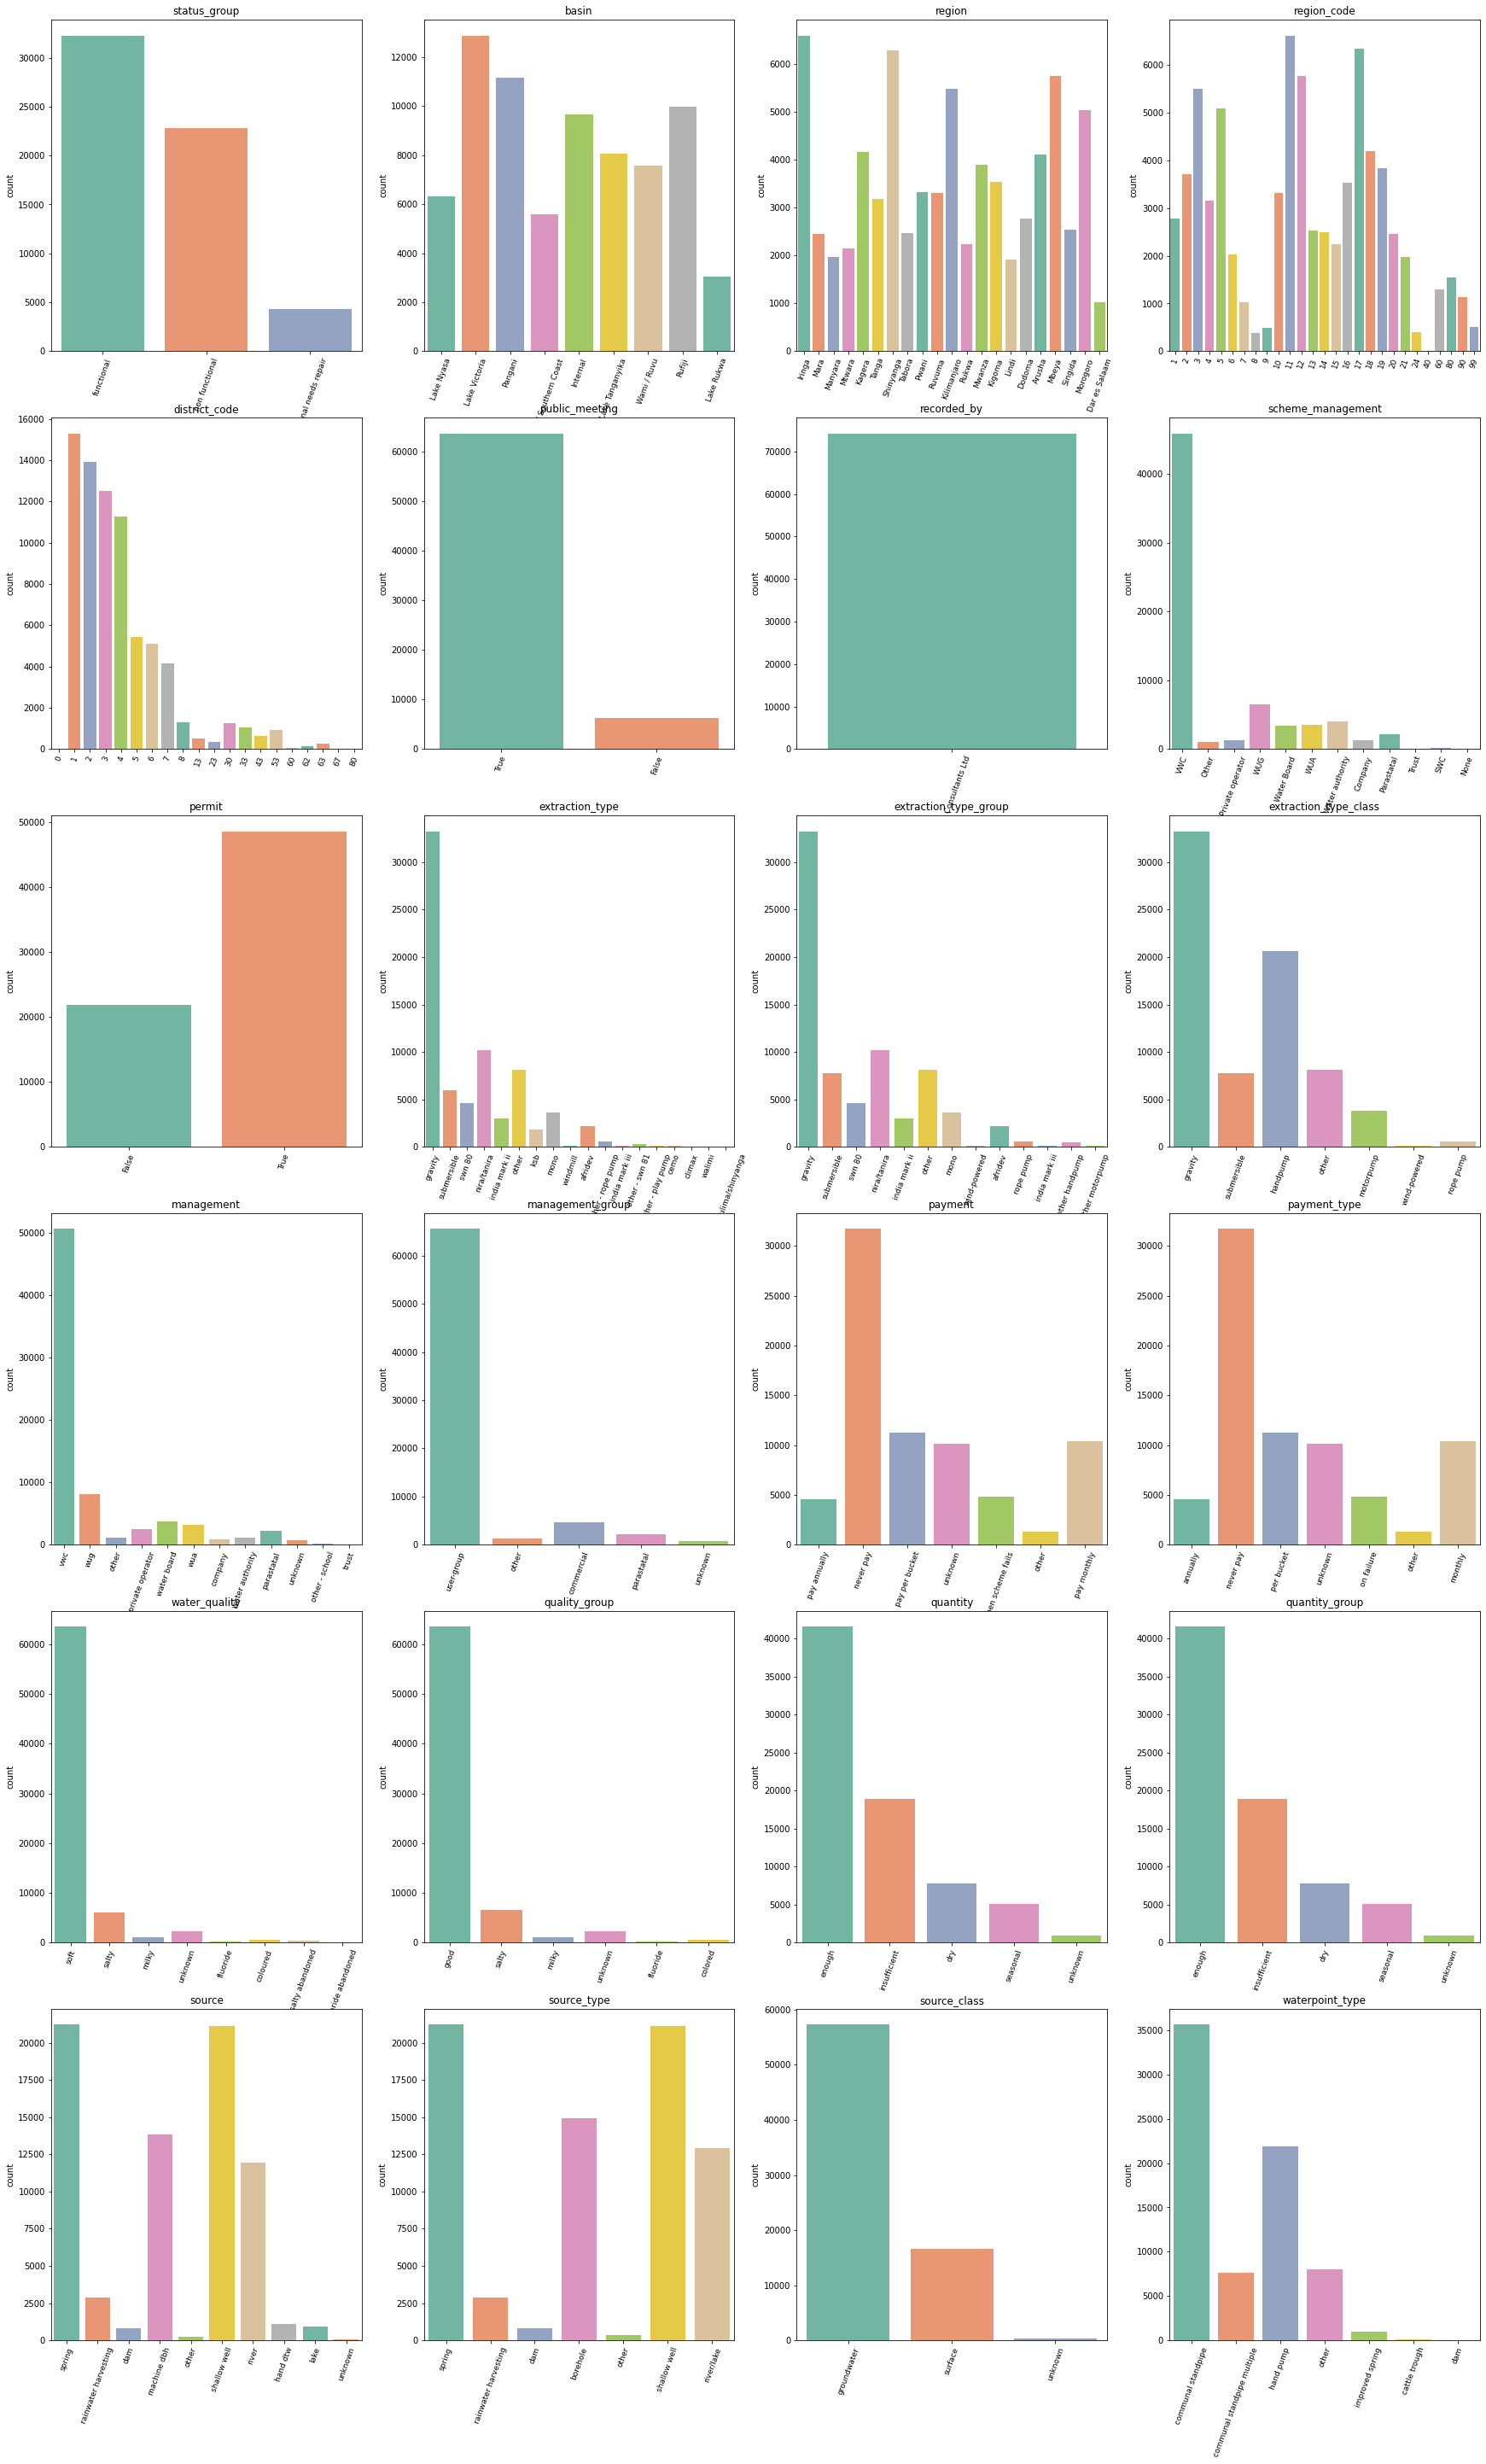

In [ ]:
#create a list of categorical features with low cardinality
low_cardinal = categorical_dqr [categorical_dqr ['Unique Values'] <=50]
cardinal_index = low_cardinal.index
low_cardinal_list = cardinal_index.to_list()

#create countplots
try:
    countplotter (raw, raw[low_cardinal_list].columns, 6,4)
except IndexError: 
    pass 

# 3 EDA - features

#### **Amount tsh**

In [ ]:
numerical_dqr.loc[['amount_tsh']]

Data Type Records Unique Values  Missing Values  Missing %  \
amount_tsh   float64   74250           102               0        0.0   

            Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
amount_tsh       318.7             0           0.0     0.0          20.0   

           Maximum Value  
amount_tsh        350000

In [ ]:
#amount_tsh has 102 unique values, but 70% of them consist of zero's. These could very well be missing values.
tsh = raw['amount_tsh'].value_counts(normalize=True)
tsh.head(3)

0.0      0.700997
500.0    0.052175
50.0     0.041791
Name: amount_tsh, dtype: float64

In [ ]:
#perhabs there is value hidden in the 'missigness' of amount_tsh, let's check this.
temp = train.copy()
temp['amount_tsh_missing'] = np.where( temp['amount_tsh']==0.0, 1, 0) # if amount_tsh =0, then 1, otherwise 0

#visualize the distribution of the y-variable 'status_group' 
distribution_checker(temp, 'amount_tsh_missing')

nr_pumps  perc_total_pumps  perc_functional  \
amount_tsh_missing                                                
0                      17761              29.9             70.7   
1                      41639              70.1             47.3   

                    perc_non_functional  perc_functional_needs_repair  
amount_tsh_missing                                                     
0                                  22.2                           7.1  
1                                  45.4                           7.3

Assuming that missing values are encoded as zero, we can see that there is some information hidden in a feature that captures its missingness. Pumps where *amount_tsh* is unavailable are less often functional and more often non-functional.

### **Date recorded**

In [ ]:
datetime_dqr(raw)

Data Type Records Unique Values  Missing Values  \
date_recorded  datetime64[ns]   74250           369               0   

               Missing %  Mean Value Minimum Value 1st Quartile     Median  \
date_recorded        0.0  2012-03-28    2001-03-26   2011-04-01 2012-10-10   

              3rd Quartile Maximum Value  
date_recorded   2013-02-09    2013-12-03

The status of the pumps was recorded between 2001 and 2013. Nothing stands out to me when looking at the data quality report. This feature could be usefull when calculating the age of the well at the time of recording.

**Recorded year**

In [ ]:
#create 'recorded_year' feature
temp = train.copy()
temp['recorded_year'] = pd.DatetimeIndex(temp ['date_recorded']).year

#check the distribution of 'status_group' for the 'recorded_year' feature
recorded = distribution_checker(temp ,'recorded_year')
recorded

nr_pumps  perc_total_pumps  perc_functional  \
recorded_year                                                
2002                  1               0.0            100.0   
2004                 30               0.1             33.3   
2011              28674              48.3             56.6   
2012               6424              10.8             48.7   
2013              24271              40.9             53.2   

               perc_non_functional  perc_functional_needs_repair  
recorded_year                                                     
2002                           0.0                           0.0  
2004                          63.3                           3.3  
2011                          37.1                           6.3  
2012                          45.7                           5.6  
2013                          38.0                           8.8

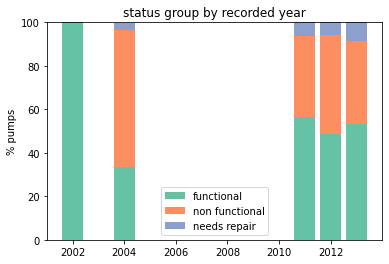

In [ ]:
#plot status group by recorded year
fig, ax = plt.subplots()
labels = temp['recorded_year'].sort_values().unique()
ax.bar(labels, recorded['perc_functional'], label = 'functional' ,  color = '#66c2a5')
ax.bar (labels, recorded['perc_non_functional'], label = 'non functional', bottom = recorded['perc_functional'] , color = '#fc8e62')
ax.bar(labels, recorded['perc_functional_needs_repair'], label = 'needs repair', bottom = recorded['perc_functional'] + recorded['perc_non_functional'], color = '#8da0cb')
ax.set_title('status group by recorded year')
ax.set_ylabel('% pumps')
plt.legend()
plt.show()

The fast majority of the recordings date from 2011 and 2013. There appears to be no effect of year of recording on the status of the pumps.

**Recorded month**

In [ ]:
#create 'recorded_year' feature
temp = train.copy()
temp['recorded_month'] = pd.DatetimeIndex(temp ['date_recorded']).month

#check the distribution of 'status_group' for the 'recorded_month' feature
recorded = distribution_checker(temp ,'recorded_month')
recorded

nr_pumps  perc_total_pumps  perc_functional  \
recorded_month                                                
1                   6354              10.7             41.1   
2                  12402              20.9             55.2   
3                  17936              30.2             61.7   
4                   3970               6.7             51.6   
5                    336               0.6             60.1   
6                    346               0.6             78.0   
7                   6928              11.7             50.2   
8                   3364               5.7             51.1   
9                    328               0.6             65.2   
10                  5466               9.2             50.9   
11                  1349               2.3             49.4   
12                   621               1.0             58.8   

                perc_non_functional  perc_functional_needs_repair  
recorded_month                                                     
1                              46.2                          12.7  
2                              37.3                           7.5  
3                              33.3                           5.0  
4                              37.3                          11.0  
5                              36.9                           3.0  
6                              19.4                           2.6  
7                              41.9                           7.9  
8                              41.4                           7.5  
9                              31.7                           3.0  
10                             43.3                           5.8  
11                             45.4                           5.2  
12                             37.8                           3.4

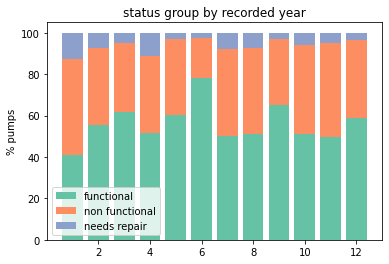

In [ ]:
#plot status group by 'recorded_month'
fig, ax = plt.subplots()
labels = temp['recorded_month'].sort_values().unique()
ax.bar(labels, recorded['perc_functional'], label = 'functional' ,  color = '#66c2a5')
ax.bar (labels, recorded['perc_non_functional'], label = 'non functional', bottom = recorded['perc_functional'] , color = '#fc8e62')
ax.bar(labels, recorded['perc_functional_needs_repair'], label = 'needs repair', bottom = recorded['perc_functional'] + recorded['perc_non_functional'], color = '#8da0cb')
ax.set_title('status group by recorded year')
ax.set_ylabel('% pumps')
plt.legend()
plt.show()

The status of most pumps is recorded in February and March and far less often in May and June. This is interessting because January and February are part of the short dry season whilst  the long rainy season lasts from March to late May. It might be easier to check the status of pumps whilst the weather is good. 

There appears to be a difference in the percentage of functional pumps over the different months, but this effect might be biased by a lower number of records during these months. 

### **Funder**

In [ ]:
categorical_dqr.loc[['funder']]

Data Type Records Unique Values  Missing Values  Missing %  \
funder    object   69746          2140            4504        6.1   

                          Mode  Mode freq.  Mode %  
funder  Government Of Tanzania       11299    16.2

In [ ]:
#check the distribution of status groups for the 10 most frequent funders
funder = distribution_checker(raw, 'funder')
funder = funder.sort_values('nr_pumps', ascending= False)
funder.head(10)

nr_pumps  perc_total_pumps  perc_functional  \
funder                                                                
Government Of Tanzania      9084              16.3             41.0   
Danida                      3114               5.6             55.0   
Hesawa                      2202               3.9             42.5   
Rwssp                       1374               2.5             58.6   
World Bank                  1349               2.4             40.4   
Kkkt                        1287               2.3             56.2   
World Vision                1246               2.2             59.6   
Unicef                      1057               1.9             56.8   
Tasaf                        877               1.6             56.2   
District Council             843               1.5             44.8   
Dhv                          829               1.5             56.6   
Private Individual           826               1.5             83.5   
Dwsp                         811               1.5             45.7   
0                            777               1.4             57.3   
Norad                        765               1.4             33.9   
Germany Republi              610               1.1             88.2   
Tcrs                         602               1.1             40.0   
Ministry Of Water            590               1.1             32.5   
Water                        583               1.0             44.3   
Dwe                          484               0.9             44.4   
Netherlands                  470               0.8             73.0   
Hifab                        450               0.8             71.8   
Adb                          448               0.8             76.1   
Lga                          442               0.8             29.4   
Amref                        425               0.8             42.4   
Fini Water                   393               0.7             13.0   
Oxfam                        359               0.6             66.3   
Wateraid                     333               0.6             73.0   
Rc Church                    321               0.6             83.5   
Isf                          316               0.6             44.9   

                        perc_non_functional  perc_functional_needs_repair  
funder                                                                     
Government Of Tanzania                 51.3                           7.7  
Danida                                 39.9                           5.1  
Hesawa                                 47.0                          10.5  
Rwssp                                  33.5                           7.9  
World Bank                             52.4                           7.2  
Kkkt                                   38.7                           5.1  
World Vision                           29.9                          10.5  
Unicef                                 33.9                           9.4  
Tasaf                                  36.5                           7.3  
District Council                       49.8                           5.3  
Dhv                                    36.3                           7.1  
Private Individual                     14.3                           2.2  
Dwsp                                   26.5                          27.7  
0                                      42.3                           0.4  
Norad                                  44.6                          21.6  
Germany Republi                        11.6                           0.2  
Tcrs                                   53.8                           6.1  
Ministry Of Water                      64.2                           3.2  
Water                                  42.4                          13.4  
Dwe                                    50.6                           5.0  
Netherlands                            24.0                           3.0  
Hif

Funder has over 2000 unique categories. The Government of Tanzania is with 16% the most common funder.  Just by looking at the top 10 most common funders we can see the 'status_group' distribution differs. I therefore think 'funder' could be an interessting column to include in a model, but we have to find a suitable way to encode it without increasing the dimensionality of the dataframe too much. 

### **Installer**

In [ ]:
categorical_dqr.loc[['installer']]

Data Type Records Unique Values  Missing Values  Missing % Mode  \
installer    object   69718          2410            4532        6.1  DWE   

           Mode freq.  Mode %  
installer       21751    31.2

In [ ]:
#check the distribution of status groups for the 10 most frequent installer
installer = distribution_checker(raw, 'installer')
installer = installer.sort_values('nr_pumps', ascending= False)
installer.head(10)

nr_pumps  perc_total_pumps  perc_functional  \
installer                                                         
DWE                    17402              31.2             54.2   
Government              1825               3.3             29.3   
RWE                     1206               2.2             25.2   
Commu                   1060               1.9             68.3   
DANIDA                  1050               1.9             51.6   
KKKT                     898               1.6             47.0   
Hesawa                   840               1.5             56.5   
0                        777               1.4             57.3   
TCRS                     707               1.3             41.0   
Central government       622               1.1             27.0   

                    perc_non_functional  perc_functional_needs_repair  
installer                                                              
DWE                                36.5                           9.3  
Government                         56.7                          14.0  
RWE                                63.4                          11.4  
Commu                              28.7                           3.0  
DANIDA                             40.5                           7.9  
KKKT                               46.1                           6.9  
Hesawa                             41.4                           2.0  
0                                  42.3                           0.4  
TCRS                               53.0                           5.9  
Central government                 72.3                           0.6

Installer has like funder a very high cardinality. DWE is by far the most common installer. Again we see differences in the distribution of 'status_group' in the top 10 installers. Installer could be an interessting feature, but it has to be encoded properly to avoid increasing the dimensionality of the dataset.

### **GPS height**

In [ ]:
numerical_dqr.loc[['gps_height']]

Data Type Records Unique Values  Missing Values  Missing %  \
gps_height     int64   74250          2456               0        0.0   

            Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
gps_height       665.7           -90           0.0   364.0        1317.0   

           Maximum Value  
gps_height          2777

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


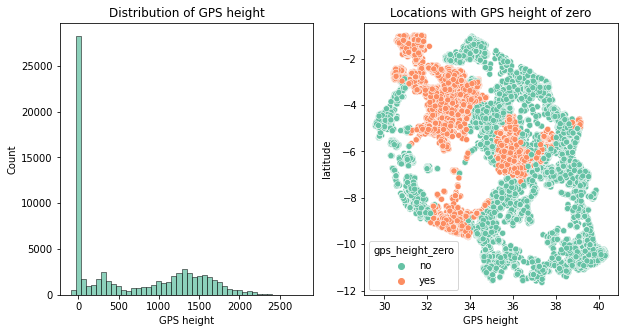

In [ ]:
fig, axes = plt.subplots(1, 2,  figsize=(10,5))

#plot distribution of gps height
sns.histplot( raw[ 'gps_height'], color = '#66c2a5', ax=axes[0])
axes[0].set(title = 'Distribution of GPS height', xlabel = 'GPS height')

#plot locations where gps height is zero
temp = raw[raw['longitude']!=0]  #only include records where logitude isn't zero
temp['gps_height_zero'] = np.where(temp['gps_height']==0, 'yes', 'no')
sns.scatterplot(x= temp['longitude'], y = temp['latitude'], hue = temp['gps_height_zero'], palette='Set2', ax = axes[1])
axes[1].set(title = 'Locations with GPS height of zero', xlabel = 'GPS height')

plt.show()

Tanzania is not located below sealevel, so any negative value for gps height cannot be correct. The normal error is gps altitude is is +- 15 meter and this applies 95% of the time. The other 5% of the time you can have any value. However, here we don't know if the gps height indicates the height of the water level, or the location of the wel....  What is clear is that the majority of the locations where a gps height of zero is registered are not located at places that are located at sealevel. I therefore conclude that missing values are registered as zero.

### **Longitude**

In [ ]:
numerical_dqr.loc[['longitude']]

Data Type Records Unique Values  Missing Values  Missing %  \
longitude   float64   74250         71870               0        0.0   

           Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
longitude        34.1             0          33.1    34.9          37.2   

          Maximum Value  
longitude       40.3452

A longitude of zero does not exist for Tanzania. Missing values are imputed as zero.

### **Latitude**

In [ ]:
numerical_dqr.loc[['latitude']]

Data Type Records Unique Values  Missing Values  Missing %  \
latitude   float64   74250         71869               0        0.0   

          Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
latitude        -5.7      -11.6494          -8.5    -5.0          -3.3   

         Maximum Value  
latitude        -2e-08

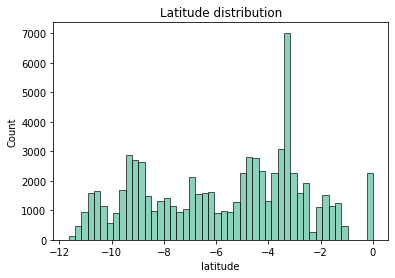

In [ ]:
#distribution of latitude
ax = sns.histplot( raw[ 'latitude'], color = '#66c2a5')
ax.set(title = 'Latitude distribution')
plt.show()

From the data quality report the presense of zero is not immediately clear, but after plotting we can see that latitudes with a value of zero are indeed present. These represent missing values and need to be imputed properly.

### **Wpt Name**

In [ ]:
categorical_dqr.loc[['wpt_name']]

Data Type Records Unique Values  Missing Values  Missing %  Mode  \
wpt_name    object   74250         45684               0        0.0  none   

          Mode freq.  Mode %  
wpt_name        4440     6.0

In [ ]:
#check the distribution of status groups for the 10 most frequent namesb
name = distribution_checker(raw, 'wpt_name')
name= name.sort_values('nr_pumps', ascending= False)
name.head(10)

nr_pumps  perc_total_pumps  perc_functional  \
wpt_name                                                       
none                 3563               6.0             73.8   
Shuleni              1748               2.9             49.1   
Zahanati              830               1.4             51.8   
Msikitini             535               0.9             49.2   
Kanisani              323               0.5             48.0   
Bombani               271               0.5             58.3   
Sokoni                260               0.4             46.2   
Ofisini               254               0.4             43.3   
School                208               0.4             41.8   
Shule Ya Msingi       199               0.3             52.3   

                 perc_non_functional  perc_functional_needs_repair  
wpt_name                                                            
none                            24.1                           2.1  
Shuleni                         42.7                           8.2  
Zahanati                        38.8                           9.4  
Msikitini                       42.6                           8.2  
Kanisani                        45.5                           6.5  
Bombani                         33.9                           7.7  
Sokoni                          43.8                          10.0  
Ofisini                         52.4                           4.3  
School                          51.9                           6.2  
Shule Ya Msingi                 36.7                          11.1

Waterpoint name has an extremely high cardinality. The most common name is 'None', indicating that the pump has no name. As expected, the name of the waterpump appears to have no relationship with the status of the pump. This is a feature that we can drop later.

### **Num private**

In [ ]:
categorical_dqr.loc[['num_private']]

Data Type Records Unique Values  Missing Values  Missing % Mode  \
num_private    object   74250            68               0        0.0    0   

             Mode freq.  Mode %  
num_private       73299    98.7

It is immediately clear that this feature will hold little information as 98.7% of the records consists of the value zero. This is a good candidate to drop from later analysis.

### **Basin**

In [ ]:
categorical_dqr.loc[['basin']]

Data Type Records Unique Values  Missing Values  Missing %  \
basin    object   74250             9               0        0.0   

                Mode  Mode freq.  Mode %  
basin  Lake Victoria       12871    17.3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


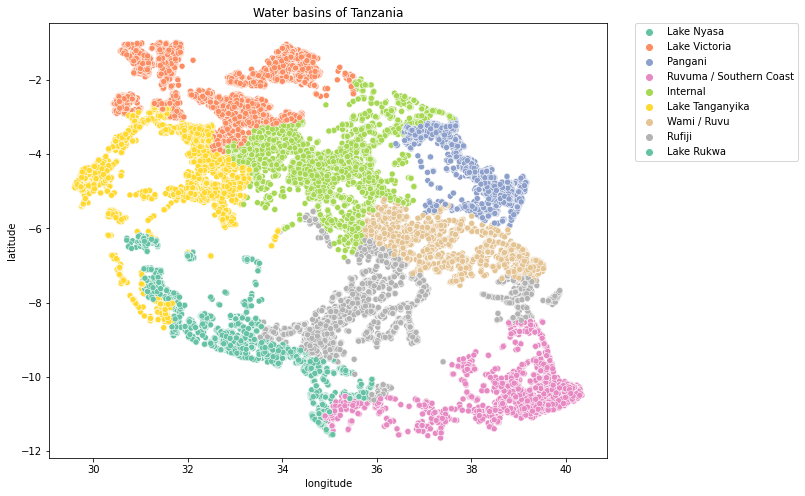

In [ ]:
#plot the water basins of Tanzania
fig, axes = plt.subplots(  figsize=(10,8))
temp = raw[raw['longitude']!=0]  #only include records where logitude isn't zero
temp['gps_height_zero'] = np.where(temp['gps_height']==0, 'yes', 'no')
ax = sns.scatterplot(x= temp['longitude'], y = temp['latitude'], hue = temp['basin'], palette='Set2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set(title = 'Water basins of Tanzania')
plt.show()

In [ ]:
basin = distribution_checker(raw, 'basin')
basin = basin.sort_values('nr_pumps', ascending= False)
basin.head(10)

nr_pumps  perc_total_pumps  perc_functional  \
basin                                                                  
Lake Victoria               10248              17.3             49.8   
Pangani                      8940              15.1             60.1   
Rufiji                       7976              13.4             63.5   
Internal                     7785              13.1             57.6   
Lake Tanganyika              6432              10.8             48.3   
Wami / Ruvu                  5987              10.1             52.4   
Lake Nyasa                   5085               8.6             65.4   
Ruvuma / Southern Coast      4493               7.6             37.2   
Lake Rukwa                   2454               4.1             40.7   

                         perc_non_functional  perc_functional_needs_repair  
basin                                                                       
Lake Victoria                           40.6                           9.7  
Pangani                                 34.6                           5.3  
Rufiji                                  31.0                           5.5  
Internal                                35.3                           7.2  
Lake Tanganyika                         40.2                          11.5  
Wami / Ruvu                             43.1                           4.5  
Lake Nyasa                              29.7                           4.9  
Ruvuma / Southern Coast                 55.6                           7.3  
Lake Rukwa                              48.2                          11.0

The distribution of pumps over the different basins if fairly equal. We previously saw that certain regions have much more functional or non-functional pumps. It is therefore not surprising that certain basins also have more or less functional pumps. 

### **Region**

In [ ]:
categorical_dqr.loc[['region']]

Data Type Records Unique Values  Missing Values  Missing %    Mode  \
region    object   74250            21               0        0.0  Iringa   

        Mode freq.  Mode %  
region        6599     8.9

In [ ]:
region = distribution_checker(raw, 'region')
region = region.sort_values('nr_pumps', ascending= False)
region.head(10)

nr_pumps  perc_total_pumps  perc_functional  perc_non_functional  \
region                                                                          
Iringa           5294               8.9             78.2                 19.5   
Shinyanga        4982               8.4             56.0                 31.3   
Mbeya            4639               7.8             50.0                 39.1   
Kilimanjaro      4379               7.4             60.3                 32.4   
Morogoro         4006               6.7             52.9                 39.6   
Arusha           3350               5.6             68.5                 26.3   
Kagera           3316               5.6             52.1                 38.8   
Mwanza           3102               5.2             48.4                 45.7   
Kigoma           2816               4.7             48.4                 30.2   
Ruvuma           2640               4.4             56.1                 37.7   

             perc_functional_needs_repair  
region                                     
Iringa                                2.3  
Shinyanga                            12.7  
Mbeya                                10.9  
Kilimanjaro                           7.4  
Morogoro                              7.5  
Arusha                                5.2  
Kagera                                9.2  
Mwanza                                5.9  
Kigoma                               21.4  
Ruvuma                                6.2

Tanzania has 21 different regions and from the table above we can already see that certain regions have a much higher proportion of functional pumps than other regions. The location of the pumps is therefore relevant. We can visulize this further using the library Folium.

In [ ]:
#plot the percentage of functional pumps by region
m = folium.Map(location=[temp['latitude'].mean(), temp['longitude'].mean()], zoom_start=6)
state_geo = f"https://raw.githubusercontent.com/thadk/GeoTZ/499a496581977655d3ff50ff10e1676f4d69fdb9/TZA_adm1_mkoaTZ.geojson"

folium.Choropleth(
    geo_data=state_geo,
    data=region,
    columns=[region.index,"perc_functional_needs_repair"],
    key_on="properties.NAME_1",
    fill_color="Purples",
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name="Functional need repair (%)",
    reset=True,
).add_to(m)

#m

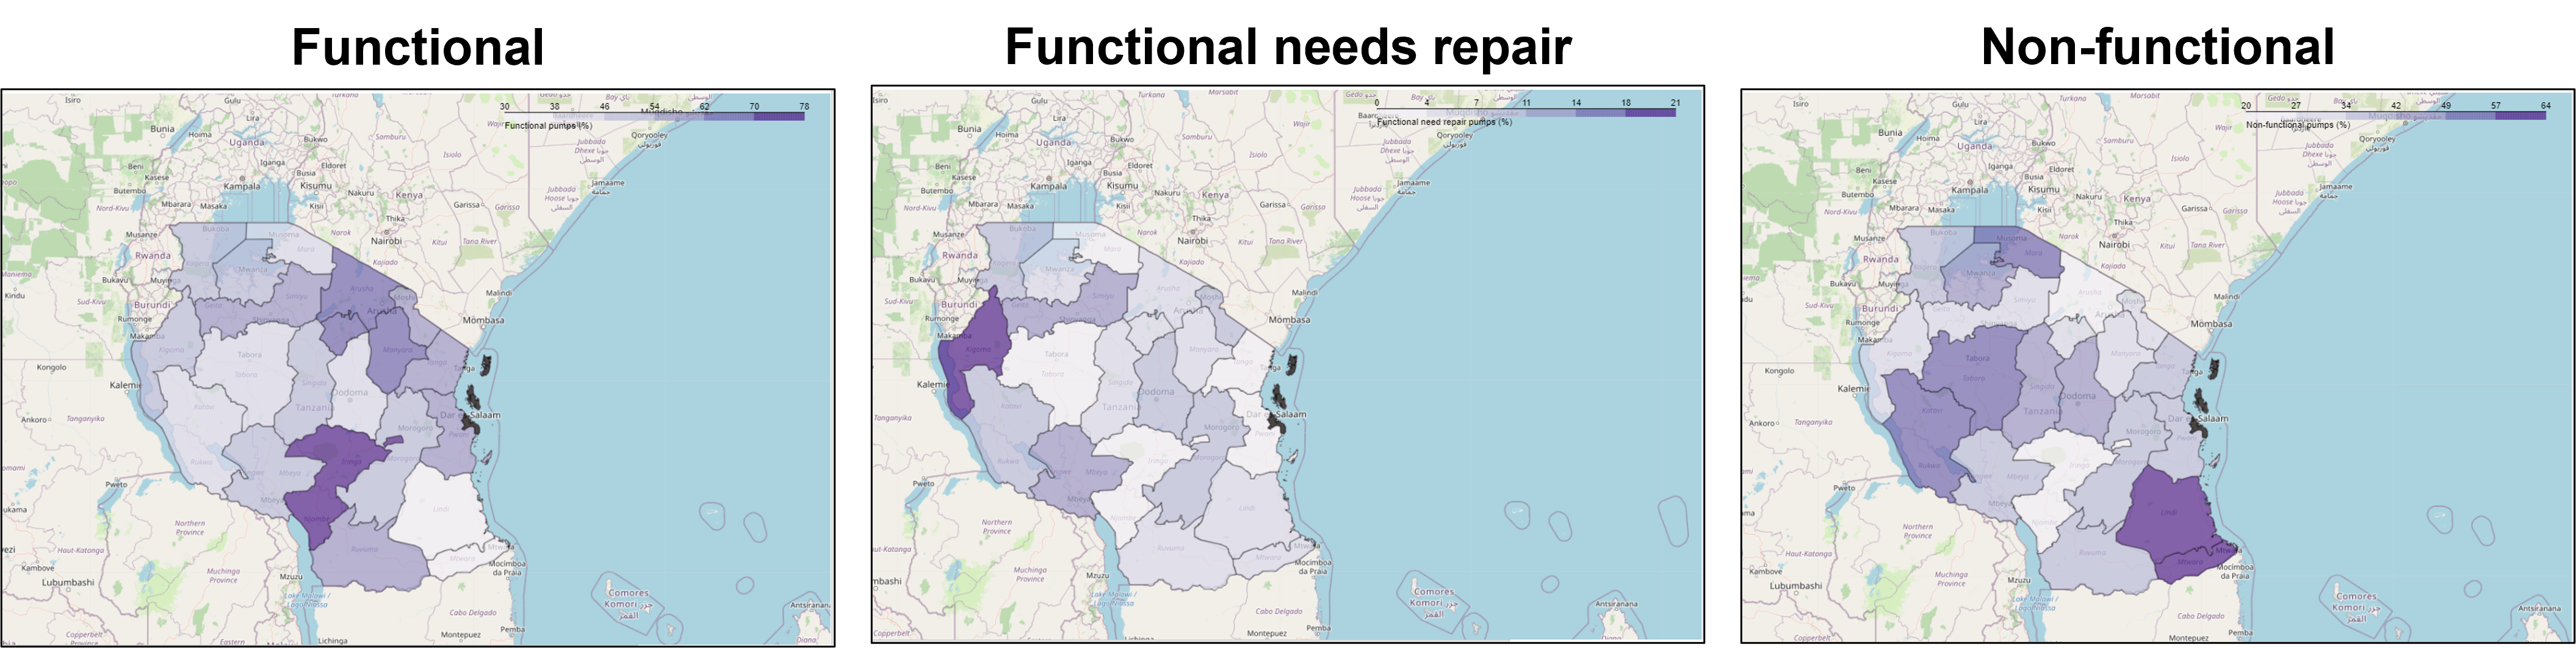

### **Region code**

In [ ]:
categorical_dqr.loc[['region_code']]

Data Type Records Unique Values  Missing Values  Missing % Mode  \
region_code    object   74250            27               0        0.0   11   

             Mode freq.  Mode %  
region_code        6608     8.9

In [ ]:
#group region_codes by region
region_code = raw.groupby([  'region', 'region_code',])['id'].count().reset_index()
region_code.head(10)

region  region_code    id
0         Arusha            2  3709
1         Arusha           24   402
2  Dar es Salaam            7  1020
3         Dodoma            1  2779
4         Iringa           11  6599
5         Kagera           18  4174
6         Kigoma           16  3533
7    Kilimanjaro            3  5494
8          Lindi            8   375
9          Lindi           18     9

In [ ]:
#check distribution of status group by region code
region_code = distribution_checker(raw, 'region_code')
region_code = region_code.sort_values('nr_pumps', ascending= False)
region_code.head(10)

nr_pumps  perc_total_pumps  perc_functional  perc_non_functional  \
region_code                                                                     
11               5300               8.9             78.2                 19.5   
17               5011               8.4             56.0                 31.3   
12               4639               7.8             50.0                 39.1   
3                4379               7.4             60.3                 32.4   
5                4040               6.8             53.1                 39.4   
18               3324               5.6             52.0                 38.8   
19               3047               5.1             48.2                 46.0   
2                3024               5.1             65.4                 28.8   
16               2816               4.7             48.4                 30.2   
10               2640               4.4             56.1                 37.7   

             perc_functional_needs_repair  
region_code                                
11                                    2.3  
17                                   12.7  
12                                   10.9  
3                                     7.4  
5                                     7.4  
18                                    9.1  
19                                    5.8  
2                                     5.8  
16                                   21.4  
10                                    6.2

Tanzania has 21 different regions, but 27 different region_codes. This means that the regio_code feature contains slightly more information that the region feature. It must be said that some of the region_code categories contain only a few pumps. The region Arusha has 68.5% functional pumps. When we look at the region_codes within Arusha, we see that this percentage varies between 65 and 97%. This is a big and interessting difference!

### **District code**

In [ ]:
categorical_dqr.loc[['district_code']]

Data Type Records Unique Values  Missing Values  Missing % Mode  \
district_code    object   74250            20               0        0.0    1   

               Mode freq.  Mode %  
district_code       15299    20.6

In [ ]:
#group region_codes by region
district_code = raw.groupby([  'region', 'district_code',])['id'].count().reset_index()
district_code.head(10)

region  district_code    id
0         Arusha              1   226
1         Arusha              2  1460
2         Arusha              3   143
3         Arusha              5   245
4         Arusha              6   391
5         Arusha              7  1244
6         Arusha             30   402
7  Dar es Salaam              1   121
8  Dar es Salaam              2   633
9  Dar es Salaam              3   266

Tanzania has 20 different district numbers, but it appears that these districts are relevant in the region context. So both Arusha and Dar es Salaam have a district 1. It might be interesting to create a region-district feature to capture this information.

### **Lga**

In [ ]:
categorical_dqr.loc[['lga']]

Data Type Records Unique Values  Missing Values  Missing %    Mode  \
lga    object   74250           125               0        0.0  Njombe   

     Mode freq.  Mode %  
lga        3128     4.2

In [ ]:
#group lga by region
lga = raw.groupby([  'region', 'lga',])['id'].count().reset_index()
lga.head(10)

region           lga    id
0         Arusha  Arusha Rural  1521
1         Arusha  Arusha Urban    82
2         Arusha        Karatu   402
3         Arusha       Longido   391
4         Arusha          Meru  1244
5         Arusha       Monduli   226
6         Arusha    Ngorongoro   245
7  Dar es Salaam         Ilala   633
8  Dar es Salaam     Kinondoni   121
9  Dar es Salaam        Temeke   266

A region consists of different lga's. There are 125 different lga's, which is a bit too much to encode in a model, but it could be an useful feature for imputing missing geospatial data.

### **Ward**

In [ ]:
categorical_dqr.loc[['ward']]

Data Type Records Unique Values  Missing Values  Missing %   Mode  \
ward    object   74250          2098               0        0.0  Igosi   

      Mode freq.  Mode %  
ward         386     0.5

In [ ]:
#group ward by lga
ward = raw.groupby([  'lga', 'ward'])['id'].count().reset_index()
ward.head(10)

lga        ward   id
0  Arusha Rural     Bangata   43
1  Arusha Rural     Bwawani   46
2  Arusha Rural  Ilkiding'a  104
3  Arusha Rural    Kimnyaki   93
4  Arusha Rural     Kiranyi  139
5  Arusha Rural     Kisongo   37
6  Arusha Rural     Mateves   28
7  Arusha Rural  Mlangarini  111
8  Arusha Rural       Moivo   52
9  Arusha Rural     Moshono   57

A lga can be further divided into different wards. A total of 2098 wards can be found in the dataset. Because of the high cardinality we cannot use this feature in a model, but it is useful for imputing purposes.

### **Subvillage**

In [ ]:
categorical_dqr.loc[['subvillage']]

Data Type Records Unique Values  Missing Values  Missing %  \
subvillage    object   73780         21425             470        0.6   

               Mode  Mode freq.  Mode %  
subvillage  Shuleni         646     0.9

In [ ]:
#group ward by lga
village= raw.groupby([  'lga', 'ward', 'subvillage'])['id'].count().reset_index()
village.head(10)

lga     ward  subvillage  id
0  Arusha Rural  Bangata  Engikaleti  23
1  Arusha Rural  Bangata      Gwasei   2
2  Arusha Rural  Bangata    Kwaniche   5
3  Arusha Rural  Bangata    Lobolosi   1
4  Arusha Rural  Bangata     Melenyi   1
5  Arusha Rural  Bangata    Ndukenyi   2
6  Arusha Rural  Bangata     Ngwasei   3
7  Arusha Rural  Bangata   Sanganani   5
8  Arusha Rural  Bangata   Sangananu   1
9  Arusha Rural  Bwawani      Buluga   2

Wards can be further divided into subvillages. The dataset contains over 20.000 subvillage. Most subvillages contain only 1 or a few pumps. This feature can be useful for imputing missing geospatial data.


### **Population**

In [ ]:
numerical_dqr.loc[['population']]

Data Type Records Unique Values  Missing Values  Missing %  \
population     int64   74250          1128               0        0.0   

            Mean Value Minimum Value  1st Quartile  Median  3rd Quartile  \
population       180.8             0           0.0    25.0         215.0   

           Maximum Value  
population         30500

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


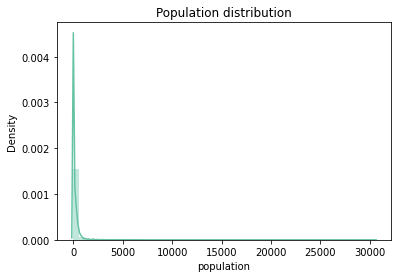

In [ ]:
#distribution of population
ax = sns.distplot( raw[ 'population'], color = '#66c2a5')
ax.set(title = 'Population distribution')
plt.show()

Many towns appear to have zero inhabitants. Again, a clear sign that missing values are imputed as zero. The marjority of villages have around 100 inhabitants, but there are a few villages that have a much bigger population. Because of the high level of categorical features I expect a tree-based model will be most suitable for this dataset. I will therefore not worry about scaling or normalizing for now. It is possible to create population bins.

### **Permit**

In [ ]:
categorical_dqr.loc[['permit']]

Data Type Records Unique Values  Missing Values  Missing %  Mode  \
permit    object   70457             2            3793        5.1  True   

        Mode freq.  Mode %  
permit       48606    69.0

In [ ]:
permit = distribution_checker(raw, 'permit')
permit.head(10)

nr_pumps  perc_total_pumps  perc_functional  perc_non_functional  \
permit                                                                     
False      17492              31.0             51.7                 40.7   
True       38852              69.0             55.4                 37.6   

        perc_functional_needs_repair  
permit                                
False                            7.5  
True                             6.9

The fast majority of pumps is build with a permit. The percentage of functional or non-functional pumps doesn't differ much between pumps that have a permit in comparrisson with pumps that do not have a permit. I expect that this feature will not be important when predicting the status of a pump.

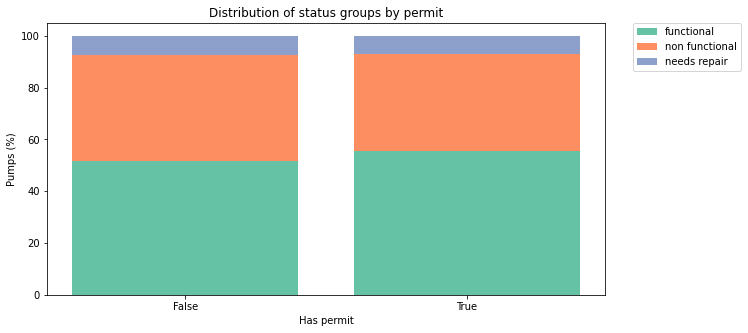

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
permit = distribution_checker(raw, 'permit')
labels = ['False', 'True']
ax.bar(labels, permit['perc_functional'], label = 'functional',  color = '#66c2a5')
ax.bar (labels, permit ['perc_non_functional'], label = 'non functional', bottom = permit['perc_functional'] , color = '#fc8e62')
ax.bar(labels, permit ['perc_functional_needs_repair'], label = 'needs repair', bottom = permit['perc_functional'] + permit['perc_non_functional'],  color = '#8da0cb')
ax.set(title = 'Distribution of status groups by permit', xlabel = 'Has permit', ylabel = 'Pumps (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### **Public meeting**

In [ ]:
categorical_dqr.loc[['public_meeting']]

Data Type Records Unique Values  Missing Values  Missing %  \
public_meeting    object   70095             2            4155        5.6   

                Mode  Mode freq.  Mode %  
public_meeting  True       63749    90.9

In [ ]:
meeting = distribution_checker(raw, 'public_meeting')
meeting.head(10)

nr_pumps  perc_total_pumps  perc_functional  \
public_meeting                                                
False               5055               9.0             43.0   
True               51011              91.0             55.7   

                perc_non_functional  perc_functional_needs_repair  
public_meeting                                                     
False                          48.3                           8.7  
True                           37.0                           7.3

The fast majority of the waterpumps has a public meeting. Interesstingly, pumps without a public meeting tend to have a higher functionality rate. It might be interessting to keep this in mind when imputing the missing values in this feature.

### **Construction year**

In [ ]:
numerical_dqr.loc[['construction_year']]

Data Type Records Unique Values  Missing Values  Missing %  \
construction_year     int64   74250            55               0        0.0   

                   Mean Value Minimum Value  1st Quartile  Median  \
construction_year      1298.5             0           0.0  1986.0   

                   3rd Quartile Maximum Value  
construction_year        2004.0          2013

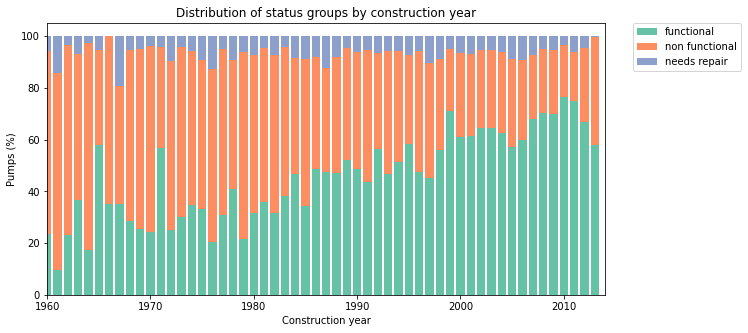

In [ ]:
#newer pumps tend to be more functional
fig, ax = plt.subplots(figsize=(10,5))
construction = distribution_checker(raw, 'construction_year')
labels = raw['construction_year'].sort_values().unique()
ax.bar(labels, construction['perc_functional'], label = 'functional',  color = '#66c2a5')
ax.bar (labels, construction['perc_non_functional'], label = 'non functional', bottom = construction['perc_functional'] , color = '#fc8e62')
ax.bar(labels, construction['perc_functional_needs_repair'], label = 'needs repair', bottom = construction['perc_functional'] + construction['perc_non_functional'],  color = '#8da0cb')
ax.set(title = 'Distribution of status groups by construction year', xlabel = 'Construction year', ylabel = 'Pumps (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim([1960,2014])
plt.show()

It is quite clear that newer pumps have a higher chance of being functional than pumps that were build longer ago. I will create a feature that represents tha age of the pump at recording. Sinds the first quartile of the data is zero, the construction year of many pumps is unknown. We can impute by the mean or median construction year of the pumps, but we could also see if there are smarter ways of imputing this feature.

### **Extraction type class**

In [ ]:
categorical_dqr.loc[['extraction_type_class']]

Data Type Records Unique Values  Missing Values  \
extraction_type_class    object   74250             7               0   

                       Missing %     Mode  Mode freq.  Mode %  
extraction_type_class        0.0  gravity       33263    44.8

In [ ]:
extraction_class = distribution_checker(raw, 'extraction_type_class')
extraction_class = extraction_class.sort_values('nr_pumps', ascending= False)
extraction_class.head(10)

nr_pumps  perc_total_pumps  perc_functional  \
extraction_type_class                                                
gravity                   26780              45.1             59.9   
handpump                  16456              27.7             63.0   
other                      6430              10.8             16.0   
submersible                6179              10.4             53.9   
motorpump                  2987               5.0             38.0   
rope pump                   451               0.8             65.0   
wind-powered                117               0.2             42.7   

                       perc_non_functional  perc_functional_needs_repair  
extraction_type_class                                                     
gravity                               30.0                          10.1  
handpump                              30.9                           6.0  
other                                 80.8                           3.2  
submersible                           42.0                           4.1  
motorpump                             57.4                           4.6  
rope pump                             31.3                           3.8  
wind-powered                          51.3                           6.0

Extraction type class is the least granular representation of the extraction features. Gravity is the most common extraction class and has comparatively many pumps that need repair. There are clear differences between the different classes, but we also have to keep in mind that some of the classes are quite rare.

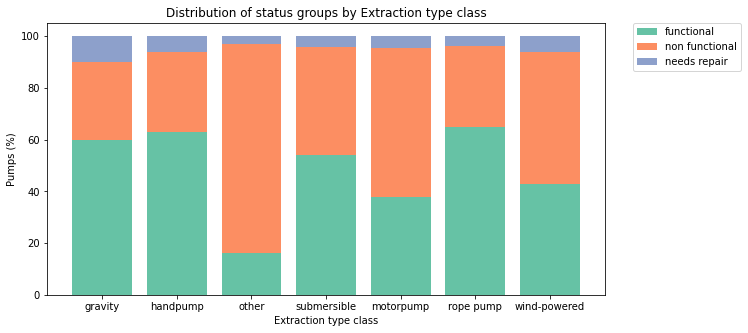

In [ ]:
#other pumps  nearly almost disfunctional
fig, ax = plt.subplots(figsize=(10,5))
labels = labels = extraction_class.index
ax.bar(labels, extraction_class['perc_functional'], label = 'functional',  color = '#66c2a5')
ax.bar (labels, extraction_class['perc_non_functional'], label = 'non functional', bottom = extraction_class['perc_functional'] , color = '#fc8e62')
ax.bar(labels, extraction_class['perc_functional_needs_repair'], label = 'needs repair', bottom = extraction_class['perc_functional'] + extraction_class['perc_non_functional'],  color = '#8da0cb')
ax.set(title = 'Distribution of status groups by Extraction type class', xlabel = 'Extraction type class', ylabel = 'Pumps (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### **Extraction type group**

In [ ]:
categorical_dqr.loc[['extraction_type_group']]

Data Type Records Unique Values  Missing Values  \
extraction_type_group    object   74250            13               0   

                       Missing %     Mode  Mode freq.  Mode %  
extraction_type_group        0.0  gravity       33263    44.8

In [ ]:
#group extraction type group by class
raw.groupby([  'extraction_type_class', 'extraction_type_group'])['id'].count().reset_index()

extraction_type_class extraction_type_group     id
0                gravity               gravity  33263
1               handpump               afridev   2208
2               handpump         india mark ii   3029
3               handpump        india mark iii    135
4               handpump           nira/tanira  10205
5               handpump        other handpump    447
6               handpump                swn 80   4588
7              motorpump                  mono   3628
8              motorpump       other motorpump    149
9                  other                 other   8102
10             rope pump             rope pump    572
11           submersible           submersible   7772
12          wind-powered          wind-powered    152

In [ ]:
extraction_group = distribution_checker(raw, 'extraction_type_group')
extraction_group  = extraction_group .sort_values('nr_pumps', ascending= False)
extraction_group .head(13)

nr_pumps  perc_total_pumps  perc_functional  \
extraction_type_group                                                
gravity                   26780              45.1             59.9   
nira/tanira                8154              13.7             66.5   
other                      6430              10.8             16.0   
submersible                6179              10.4             53.9   
swn 80                     3670               6.2             56.9   
mono                       2865               4.8             37.8   
india mark ii              2400               4.0             60.3   
afridev                    1770               3.0             67.8   
rope pump                   451               0.8             65.0   
other handpump              364               0.6             47.3   
other motorpump             122               0.2             43.4   
wind-powered                117               0.2             42.7   
india mark iii               98               0.2             44.9   

                       perc_non_functional  perc_functional_needs_repair  
extraction_type_group                                                     
gravity                               30.0                          10.1  
nira/tanira                           25.7                           7.9  
other                                 80.8                           3.2  
submersible                           42.0                           4.1  
swn 80                                37.3                           5.8  
mono                                  57.7                           4.5  
india mark ii                         36.4                           3.3  
afridev                               29.8                           2.4  
rope pump                             31.3                           3.8  
other handpump                        47.3                           5.5  
other motorpump                       49.2                           7.4  
wind-powered                          51.3                           6.0  
india mark iii                        54.1                           1.0

The extraction type group provides a little bit more detail than the extraction type class. However, by dividing the classes into groups, the data becomes more granular with some groups having only a few pumps. It could be interessting to keep groups with a good number of pumps and group smaller groups together.

### **Extraction type**

In [ ]:
categorical_dqr.loc[['extraction_type']]

Data Type Records Unique Values  Missing Values  Missing %  \
extraction_type    object   74250            18               0        0.0   

                    Mode  Mode freq.  Mode %  
extraction_type  gravity       33263    44.8

In [ ]:
#group extraction type  by class and group
raw.groupby([  'extraction_type_class', 'extraction_type_group', 'extraction_type'])['id'].count().reset_index()

extraction_type_class extraction_type_group            extraction_type  \
0                gravity               gravity                    gravity   
1               handpump               afridev                    afridev   
2               handpump         india mark ii              india mark ii   
3               handpump        india mark iii             india mark iii   
4               handpump           nira/tanira                nira/tanira   
5               handpump        other handpump  other - mkulima/shinyanga   
6               handpump        other handpump          other - play pump   
7               handpump        other handpump             other - swn 81   
8               handpump        other handpump                     walimi   
9               handpump                swn 80                     swn 80   
10             motorpump                  mono                       mono   
11             motorpump       other motorpump                       cemo   
12             motorpump       other motorpump                     climax   
13                 other                 other                      other   
14             rope pump             rope pump          other - rope pump   
15           submersible           submersible                        ksb   
16           submersible           submersible                submersible   
17          wind-powered          wind-powered                   windmill   

       id  
0   33263  
1    2208  
2    3029  
3     135  
4   10205  
5       2  
6     101  
7     284  
8      60  
9    4588  
10   3628  
11    108  
12     41  
13   8102  
14    572  
15   1790  
16   5982  
17    152

In [ ]:
extraction_type= distribution_checker(raw, 'extraction_type')
extraction_type = extraction_type.sort_values('nr_pumps', ascending= False)
extraction_type


nr_pumps  perc_total_pumps  perc_functional  \
extraction_type                                                          
gravity                       26780              45.1             59.9   
nira/tanira                    8154              13.7             66.5   
other                          6430              10.8             16.0   
submersible                    4764               8.0             55.1   
swn 80                         3670               6.2             56.9   
mono                           2865               4.8             37.8   
india mark ii                  2400               4.0             60.3   
afridev                        1770               3.0             67.8   
ksb                            1415               2.4             49.7   
other - rope pump               451               0.8             65.0   
other - swn 81                  229               0.4             52.4   
windmill                        117               0.2             42.7   
india mark iii                   98               0.2             44.9   
cemo                             90               0.2             50.0   
other - play pump                85               0.1             34.1   
walimi                           48               0.1             47.9   
climax                           32               0.1             25.0   
other - mkulima/shinyanga         2               0.0              0.0   

                           perc_non_functional  perc_functional_needs_repair  
extraction_type                                                               
gravity                                   30.0                          10.1  
nira/tanira                               25.7                           7.9  
other                                     80.8                           3.2  
submersible                               40.1                           4.8  
swn 80                                    37.3                           5.8  
mono                                      57.7                           4.5  
india mark ii                             36.4                           3.3  
afridev                                   29.8                           2.4  
ksb                                       48.5                           1.8  
other - rope pump                         31.3                           3.8  
other - swn 81                            44.5                           3.1  
windmill                                  51.3                           6.0  
india mark iii                            54.1                           1.0  
cemo                                      40.0                          10.0  
other - play pump                         64.7                           1.2  
walimi                                    27.1                          25.0  
climax                                    75.0                           0.0  
other - mkulima/shinyanga                100.0                           0.0

Extraction type captures the most detailed information about the extraction process.  There are clearly some differences between the classes, but the rarest class only contains 2 pumps. It makes sense to group rare classes where possible. 

### **Management group**

In [ ]:
categorical_dqr.loc[['management_group']]

Data Type Records Unique Values  Missing Values  Missing %  \
management_group    object   74250             5               0        0.0   

                        Mode  Mode freq.  Mode %  
management_group  user-group       65538    88.3

In [ ]:
management_group = distribution_checker(raw, 'management_group')
management_group = management_group.sort_values('nr_pumps', ascending= False)
management_group.head(10)

nr_pumps  perc_total_pumps  perc_functional  \
management_group                                                
user-group           52490              88.4             53.8   
commercial            3638               6.1             61.4   
parastatal            1768               3.0             57.7   
other                  943               1.6             56.0   
unknown                561               0.9             39.9   

                  perc_non_functional  perc_functional_needs_repair  
management_group                                                     
user-group                       38.7                           7.4  
commercial                       35.3                           3.2  
parastatal                       30.4                          11.9  
other                            38.1                           5.9  
unknown                          55.3                           4.8

Management group is the least granular representation of the management features. The fast majority of the  pumps are management by user-groups. We can also see that parastatal pumps tend to need more repairs than the other groups. I think one of the more granular features will be more useful to include in a model.

### **Scheme management**

In [ ]:
categorical_dqr.loc[['scheme_management']]

Data Type Records Unique Values  Missing Values  Missing %  \
scheme_management    object   69404            12            4846        6.5   

                  Mode  Mode freq.  Mode %  
scheme_management  VWC       45917    66.2

In [ ]:
#show schema management by management group
scheme_management = raw.groupby([  'management_group', 'scheme_management' ])['id'].count().reset_index()
scheme_management.tail(10)

management_group scheme_management     id
35       user-group             Other    196
36       user-group        Parastatal     61
37       user-group  Private operator    102
38       user-group               SWC     11
39       user-group             Trust      9
40       user-group               VWC  45382
41       user-group               WUA   3270
42       user-group               WUG   6452
43       user-group       Water Board   3426
44       user-group   Water authority   2596

In [ ]:
scheme = distribution_checker(raw, 'scheme_management')
scheme = scheme.sort_values('nr_pumps', ascending= False)
scheme.head(10)

nr_pumps  perc_total_pumps  perc_functional  \
scheme_management                                                
VWC                   36793              66.3             51.5   
WUG                    5206               9.4             57.7   
Water authority        3153               5.7             51.3   
WUA                    2883               5.2             69.2   
Water Board            2748               4.9             74.7   
Parastatal             1680               3.0             57.5   
Private operator       1063               1.9             68.6   
Company                1061               1.9             50.3   
Other                   766               1.4             59.8   
SWC                      97               0.2             20.6   

                   perc_non_functional  perc_functional_needs_repair  
scheme_management                                                     
VWC                               42.1                           6.3  
WUG                               29.4                          12.9  
Water authority                   34.5                          14.2  
WUA                               22.5                           8.3  
Water Board                       21.3                           4.0  
Parastatal                        30.5                          12.0  
Private operator                  29.3                           2.2  
Company                           46.2                           3.5  
Other                             37.3                           2.9  
SWC                               78.4                           1.0

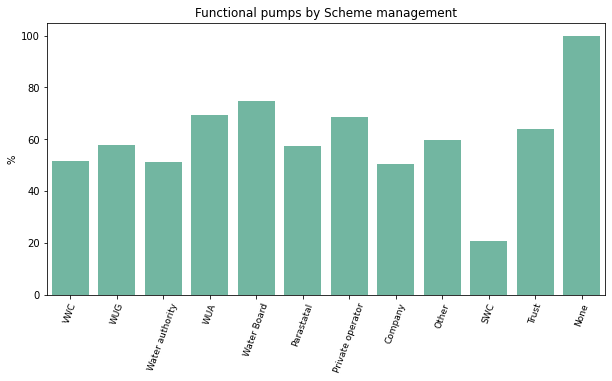

In [ ]:
#percentage of functional pumps differs for different scheme management categories
fig, ax = plt.subplots(figsize=(10,5))
ax =sns.barplot(x = scheme.index, y = scheme['perc_functional'], color =  '#66c2a5')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, fontsize=9)
ax.set(title = 'Functional pumps by Scheme management', ylabel = '%', xlabel = "")
plt.show()

Scheme management provides a bit more information than the management group feature. It does remain a confusing feature as the scheme management 'parastatal' occurs both within the parastatal group as the unknown as user-group. We can see that certain schemes have more disfunctional pumps than others. The vast majority of pumps are managed by VWC. A report from Water Aid Tanzania from 2006 describes the roles of the different scheme management categories. I think this is the most informative management feature.  The report also groups management into autonomous, non-autonomous and private classes.

In [ ]:
#the use of submersible pumps is common for private operators
private = raw[raw['scheme_management']=='Private operator']
private_extraction = private.groupby('extraction_type_class')['id'].count().reset_index()
private_extraction['total_pumps'] =private_extraction['id'].sum()
private_extraction['percentage'] = round((private_extraction['id']/ private_extraction['total_pumps'])*100,1)
private_extraction = private_extraction.sort_values('percentage', ascending = False)
private_extraction = private_extraction.drop(['id', 'total_pumps'],axis=1)
private_extraction

extraction_type_class  percentage
5           submersible        50.5
1              handpump        14.0
3                 other        14.0
0               gravity        12.0
2             motorpump         7.6
4             rope pump         1.1
6          wind-powered         0.8

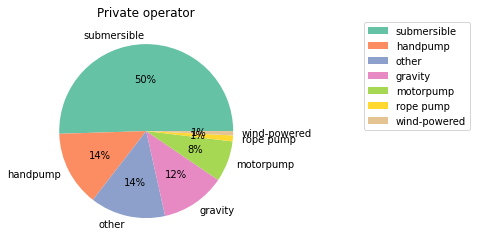

In [ ]:
#define data
data = private_extraction['percentage']
labels = private_extraction['extraction_type_class']

#define Seaborn color palette to use
colors = sns.color_palette('Set2')

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend(bbox_to_anchor=(1.5, 1), loc=2, borderaxespad=0.)
plt.title("Private operator")
plt.show()

In [ ]:
#the use of submersible pumps is common for private operators
vwc = raw[raw['scheme_management']=='VWC']
vwc_extraction = vwc .groupby('extraction_type_class')['id'].count().reset_index()
vwc_extraction['total_pumps'] =vwc_extraction['id'].sum()
vwc_extraction['percentage'] = round((vwc_extraction['id']/ vwc_extraction['total_pumps'])*100,1)
vwc_extraction = vwc_extraction.sort_values('percentage', ascending = False)
vwc_extraction = vwc_extraction.drop(['id', 'total_pumps'],axis=1)
vwc_extraction

extraction_type_class  percentage
0               gravity        47.1
1              handpump        26.6
3                 other        10.2
5           submersible         8.9
2             motorpump         6.5
4             rope pump         0.4
6          wind-powered         0.2

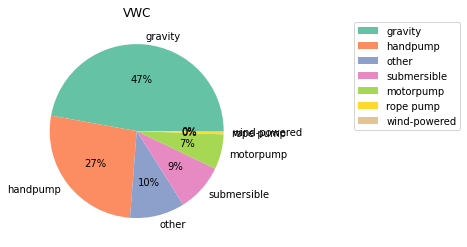

In [ ]:
#define data
data = vwc_extraction['percentage']
labels = vwc_extraction['extraction_type_class']

#define Seaborn color palette to use
colors = sns.color_palette('Set2')

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend(bbox_to_anchor=(1.5, 1), loc=2, borderaxespad=0.)
plt.title("VWC")
plt.show()

In [ ]:
#non-private operators tend to work with gravity pumps
non_private = raw[raw['scheme_management']!='Private operator']
overall_extraction = non_private.groupby('extraction_type_class')['id'].count().reset_index()
overall_extraction['total_pumps'] =overall_extraction['id'].sum()
overall_extraction['percentage'] = round((overall_extraction['id']/ overall_extraction['total_pumps'])*100,1)
overall_extraction = overall_extraction.sort_values('percentage', ascending = False)
overall_extraction = overall_extraction.drop(['id', 'total_pumps'],axis=1)
overall_extraction

extraction_type_class  percentage
0               gravity        45.4
1              handpump        28.0
3                 other        10.9
5           submersible         9.7
2             motorpump         5.0
4             rope pump         0.8
6          wind-powered         0.2

### **management**

In [ ]:
categorical_dqr.loc[['management']]

Data Type Records Unique Values  Missing Values  Missing % Mode  \
management    object   74250            12               0        0.0  vwc   

            Mode freq.  Mode %  
management       50624    68.2

In [ ]:
#show management by schema management by management group
management = raw.groupby([  'management_group', 'scheme_management' , 'management'])['id'].count().reset_index()
management.tail(10)

management_group scheme_management   management    id
76       user-group               WUG          wua     1
77       user-group               WUG          wug  5953
78       user-group       Water Board          vwc   529
79       user-group       Water Board  water board  2711
80       user-group       Water Board          wua    47
81       user-group       Water Board          wug   139
82       user-group   Water authority          vwc  1643
83       user-group   Water authority  water board   922
84       user-group   Water authority          wua    12
85       user-group   Water authority          wug    19

In [ ]:
management = distribution_checker(raw, 'management')
management= management.sort_values('nr_pumps', ascending= False)
management.head(10)

nr_pumps  perc_total_pumps  perc_functional  \
management                                                      
vwc                  40507              68.2             50.4   
wug                   6515              11.0             60.0   
water board           2933               4.9             74.0   
wua                   2535               4.3             69.1   
private operator      1971               3.3             74.9   
parastatal            1768               3.0             57.7   
water authority        904               1.5             49.3   
other                  844               1.4             59.8   
company                685               1.2             39.0   
unknown                561               0.9             39.9   

                  perc_non_functional  perc_functional_needs_repair  
management                                                           
vwc                              42.7                           6.9  
wug                              30.1                           9.9  
water board                      17.0                           9.0  
wua                              22.8                           8.1  
private operator                 22.9                           2.2  
parastatal                       30.4                          11.9  
water authority                  44.9                           5.8  
other                            33.6                           6.5  
company                          58.8                           2.2  
unknown                          55.3                           4.8

Management has a similar cardinality as scheme management. It is not clear how these columns relate to each other. After reading the report by WaterAid Tanzania, I will focus on the management scheme.

### **Payment**

In [ ]:
categorical_dqr.loc[['payment']]

Data Type Records Unique Values  Missing Values  Missing %       Mode  \
payment    object   74250             7               0        0.0  never pay   

         Mode freq.  Mode %  
payment       31712    42.7

In [ ]:
payment = distribution_checker(raw, 'payment')
payment  = payment .sort_values('nr_pumps', ascending= False)
payment.head(10)

nr_pumps  perc_total_pumps  perc_functional  \
payment                                                              
never pay                 25348              42.7             44.9   
pay per bucket             8985              15.1             67.8   
pay monthly                8300              14.0             66.0   
unknown                    8157              13.7             43.3   
pay when scheme fails      3914               6.6             62.1   
pay annually               3642               6.1             75.2   
other                      1054               1.8             58.0   

                       perc_non_functional  perc_functional_needs_repair  
payment                                                                   
never pay                             47.6                           7.5  
pay per bucket                        27.7                           4.6  
pay monthly                           22.8                          11.2  
unknown                               51.5                           5.3  
pay when scheme fails                 30.9                           7.1  
pay annually                          18.0                           6.8  
other                                 30.8                          11.2

Most of the pumps are completely free. It seems like the pumps that require some form of payment have a higher functionality rate.

### **Payment type**

In [ ]:
categorical_dqr.loc[['payment_type']]

Data Type Records Unique Values  Missing Values  Missing %  \
payment_type    object   74250             7               0        0.0   

                   Mode  Mode freq.  Mode %  
payment_type  never pay       31712    42.7

In [ ]:
raw.head()

id    status_group  amount_tsh date_recorded        funder  gps_height  \
0  69572      functional      6000.0    2011-03-14         Roman        1390   
1   8776      functional         0.0    2013-03-06       Grumeti        1399   
2  34310      functional        25.0    2013-02-25  Lottery Club         686   
3  67743  non functional         0.0    2013-01-28        Unicef         263   
4  19728      functional         0.0    2011-07-13   Action In A           0   

      installer  longitude   latitude              wpt_name num_private  \
0         Roman  34.938093  -9.856322                  none           0   
1       GRUMETI  34.698766  -2.147466              Zahanati           0   
2  World vision  37.460664  -3.821329           Kwa Mahundi           0   
3        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu           0   
4       Artisan  31.130847  -1.825359               Shuleni           0   

                     basin  subvillage   region region_code district_code  \
0               Lake Nyasa    Mnyusi B   Iringa          11             5   
1            Lake Victoria     Nyamara     Mara          20             2   
2                  Pangani     Majengo  Manyara          21             4   
3  Ruvuma / Southern Coast  Mahakamani   Mtwara          90            63   
4            Lake Victoria  Kyanyamisa   Kagera          18             1   

         lga        ward  population public_meeting              recorded_by  \
0     Ludewa    Mundindi         109           True  GeoData Consultants Ltd   
1  Serengeti       Natta         280            NaN  GeoData Consultants Ltd   
2  Simanjiro     Ngorika         250           True  GeoData Consultants Ltd   
3   Nanyumbu    Nanyumbu          58           True  GeoData Consultants Ltd   
4    Karagwe  Nyakasimbi           0           True  GeoData Consultants Ltd   

  scheme_management                  scheme_name permit  construction_year  \
0               VWC                        Roman  False               1999   
1             Other                          NaN   True               2010   
2               VWC  Nyumba ya mungu pipe scheme   True               2009   
3               VWC                          NaN   True               1986   
4               NaN                          NaN   True                  0   

  extraction_type extraction_type_group extraction_type_class management  \
0         gravity               gravity               gravity        vwc   
1         gravity               gravity               gravity        wug   
2         gravity               gravity               gravity        vwc   
3     submersible           submersible           submersible        vwc   
4         gravity               gravity               gravity      other   

  management_group         payment payment_type water_quality quality_group  \
0       user-group    pay annually     annually          soft          good   
1       user-group       never pay    never pay          soft          good   
2       user-group  pay per bucket   per bucket          soft          good   
3       user-group       never pay    never pay          soft          good   
4            other       never pay    never pay          soft          good   

       quantity quantity_group                source           source_type  \
0        enough         enough                spring                spring   
1  insufficient   insufficient  rainwater harvesting  rainwater harvesting   
2        enough         enough                   dam                   dam   
3           dry            dry           machine dbh              borehole   
4      seasonal       seasonal  rainwater harvesting  rainwater harvesting   

  source_class              waterpoint_type waterpoint_type_group  
0  groundwater           communal standpipe    communal standpipe  
1      surface           communal standpipe    communal standpipe  
2      surface  communal standpipe multiple    communal 

In [ ]:
#compare payment and payment type
payment_type = raw.groupby([  'payment', 'payment_type'])['id'].count().reset_index()
payment_type .head(10)

payment payment_type     id
0              never pay    never pay  31712
1                  other        other   1314
2           pay annually     annually   4570
3            pay monthly      monthly  10397
4         pay per bucket   per bucket  11266
5  pay when scheme fails   on failure   4842
6                unknown      unknown  10149

In [ ]:
payment = distribution_checker(raw, 'payment_type')
payment

nr_pumps  perc_total_pumps  perc_functional  \
payment_type                                                
annually          3642               6.1             75.2   
monthly           8300              14.0             66.0   
never pay        25348              42.7             44.9   
on failure        3914               6.6             62.1   
other             1054               1.8             58.0   
per bucket        8985              15.1             67.8   
unknown           8157              13.7             43.3   

              perc_non_functional  perc_functional_needs_repair  
payment_type                                                     
annually                     18.0                           6.8  
monthly                      22.8                          11.2  
never pay                    47.6                           7.5  
on failure                   30.9                           7.1  
other                        30.8                          11.2  
per bucket                   27.7                           4.6  
unknown                      51.5                           5.3

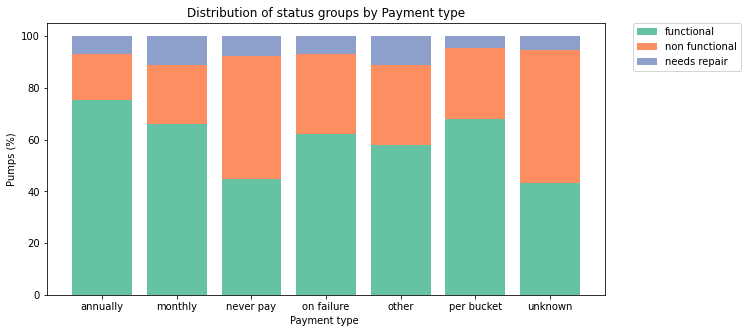

In [ ]:
#pumps for which you have to pay have a higher functionality rate
fig, ax = plt.subplots(figsize=(10,5))
payment = distribution_checker(raw, 'payment_type')
labels = raw['payment_type'].sort_values().unique()
ax.bar(labels, payment ['perc_functional'], label = 'functional',  color = '#66c2a5')
ax.bar (labels, payment ['perc_non_functional'], label = 'non functional', bottom = payment ['perc_functional'] , color = '#fc8e62')
ax.bar(labels, payment ['perc_functional_needs_repair'], label = 'needs repair', bottom = payment ['perc_functional'] + payment ['perc_non_functional'],  color = '#8da0cb')
ax.set(title = 'Distribution of status groups by Payment type', xlabel = 'Payment type ', ylabel = 'Pumps (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Payment and payment type are exactly the same so there is no need to keep both features.

### **Quality group**

In [ ]:
categorical_dqr.loc[['quality_group']]

Data Type Records Unique Values  Missing Values  Missing %  \
quality_group    object   74250             6               0        0.0   

               Mode  Mode freq.  Mode %  
quality_group  good       63505    85.5

In [ ]:
quality_group = distribution_checker(raw, 'quality_group')
quality_group  = quality_group  .sort_values('nr_pumps', ascending= False)
quality_group .head(10)

nr_pumps  perc_total_pumps  perc_functional  \
quality_group                                                
good              50818              85.6             56.6   
salty              5195               8.7             46.1   
unknown            1876               3.2             14.1   
milky               804               1.4             54.5   
colored             490               0.8             50.2   
fluoride            217               0.4             72.4   

               perc_non_functional  perc_functional_needs_repair  
quality_group                                                     
good                          35.7                           7.7  
salty                         48.2                           5.7  
unknown                       84.1                           1.9  
milky                         43.8                           1.7  
colored                       38.8                          11.0  
fluoride                      21.7                           6.0

There are 6 different quality groups. The majority of the pumps have good water quality. Fluoride, salinity and milkynes are signs of poor water quality. The report describes how water quality is often dependend on the season so it is not the most reliable feature in the dataset. 

### **Water quality**

In [ ]:
categorical_dqr.loc[['water_quality']]

Data Type Records Unique Values  Missing Values  Missing %  \
water_quality    object   74250             8               0        0.0   

               Mode  Mode freq.  Mode %  
water_quality  soft       63505    85.5

In [ ]:
#water quality by quality group
raw.groupby([  'quality_group', 'water_quality'])['id'].count().reset_index()



quality_group       water_quality     id
0       colored            coloured    623
1      fluoride            fluoride    244
2      fluoride  fluoride abandoned     23
3          good                soft  63505
4         milky               milky   1005
5         salty               salty   6082
6         salty     salty abandoned    423
7       unknown             unknown   2345

In [ ]:
water_quality = distribution_checker(raw, 'water_quality')
water_quality  = water_quality .sort_values('nr_pumps', ascending= False)
water_quality .head(10)

nr_pumps  perc_total_pumps  perc_functional  \
water_quality                                                     
soft                   50818              85.6             56.6   
salty                   4856               8.2             45.7   
unknown                 1876               3.2             14.1   
milky                    804               1.4             54.5   
coloured                 490               0.8             50.2   
salty abandoned          339               0.6             51.3   
fluoride                 200               0.3             75.5   
fluoride abandoned        17               0.0             35.3   

                    perc_non_functional  perc_functional_needs_repair  
water_quality                                                          
soft                               35.7                           7.7  
salty                              49.6                           4.6  
unknown                            84.1                           1.9  
milky                              43.8                           1.7  
coloured                           38.8                          11.0  
salty abandoned                    27.4                          21.2  
fluoride                           18.0                           6.5  
fluoride abandoned                 64.7                           0.0

Water quality captures very similar information as quality group except that it splits the fluoride and salty categories up into two subcategories. One of the fluoride subclasse only contains 17 pumps. The salty abandoned class has only 339 pumps, but it's distribution differs quite a bit from the salty class. I will probably keep this granular feature, but I don't think it will make a huge difference.

### **Quantity group**

In [ ]:
categorical_dqr.loc[['quantity_group']]

Data Type Records Unique Values  Missing Values  Missing %  \
quantity_group    object   74250             5               0        0.0   

                  Mode  Mode freq.  Mode %  
quantity_group  enough       41522    55.9

In [ ]:
quantity_group = distribution_checker(raw, 'quantity_group')
quantity_group  = quantity_group  .sort_values('nr_pumps', ascending= False)
quantity_group .head(10)

nr_pumps  perc_total_pumps  perc_functional  \
quantity_group                                                
enough             33186              55.9             65.2   
insufficient       15129              25.5             52.3   
dry                 6246              10.5              2.5   
seasonal            4050               6.8             57.4   
unknown              789               1.3             27.0   

                perc_non_functional  perc_functional_needs_repair  
quantity_group                                                     
enough                         27.5                           7.2  
insufficient                   38.1                           9.6  
dry                            96.9                           0.6  
seasonal                       32.3                          10.3  
unknown                        71.2                           1.8

There are 5 different quantity groups. The majoirty of the pumps have enough water, but surely this feature is affected by the season in which the recording was done. Dry pump are pretty much always disfunctional.

### **Quantity**

In [ ]:
categorical_dqr.loc[['quantity']]

Data Type Records Unique Values  Missing Values  Missing %    Mode  \
quantity    object   74250             5               0        0.0  enough   

          Mode freq.  Mode %  
quantity       41522    55.9

In [ ]:
raw.groupby([  'quantity_group', 'quantity' ])['id'].count().reset_index()


quantity_group      quantity     id
0            dry           dry   7782
1         enough        enough  41522
2   insufficient  insufficient  18896
3       seasonal      seasonal   5075
4        unknown       unknown    975

In [ ]:
quantity= distribution_checker(raw, 'quantity')
quantity  = quantity.sort_values('nr_pumps', ascending= False)
quantity .head(10)

nr_pumps  perc_total_pumps  perc_functional  \
quantity                                                    
enough           33186              55.9             65.2   
insufficient     15129              25.5             52.3   
dry               6246              10.5              2.5   
seasonal          4050               6.8             57.4   
unknown            789               1.3             27.0   

              perc_non_functional  perc_functional_needs_repair  
quantity                                                         
enough                       27.5                           7.2  
insufficient                 38.1                           9.6  
dry                          96.9                           0.6  
seasonal                     32.3                          10.3  
unknown                      71.2                           1.8

Quanity and quantity group capture the exact same information so we can remove one of the features.

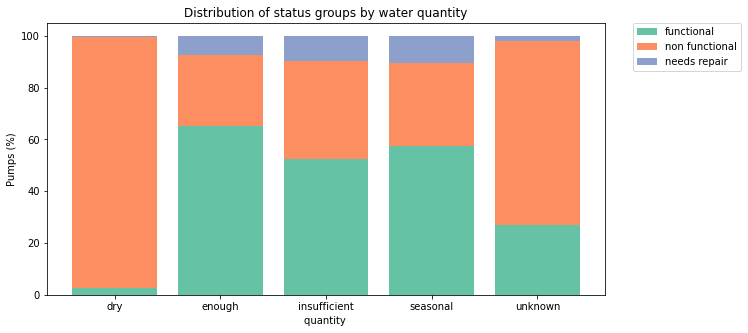

In [ ]:
#dry pumps are nearly never functional
fig, ax = plt.subplots(figsize=(10,5))
quantity = distribution_checker(raw, 'quantity')
labels = raw['quantity'].sort_values().unique()
ax.bar(labels, quantity ['perc_functional'], label = 'functional',  color = '#66c2a5')
ax.bar (labels, quantity ['perc_non_functional'], label = 'non functional', bottom = quantity ['perc_functional'] , color = '#fc8e62')
ax.bar(labels, quantity ['perc_functional_needs_repair'], label = 'needs repair', bottom = quantity ['perc_functional'] + quantity ['perc_non_functional'],  color = '#8da0cb')
ax.set(title = 'Distribution of status groups by water quantity', xlabel = 'quantity ', ylabel = 'Pumps (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### **Source class**

In [ ]:
categorical_dqr.loc[['source_class']]

Data Type Records Unique Values  Missing Values  Missing %  \
source_class    object   74250             3               0        0.0   

                     Mode  Mode freq.  Mode %  
source_class  groundwater       57286    77.2

In [ ]:
source_class = distribution_checker(raw, 'source_class')
source_class  = source_class .sort_values('nr_pumps', ascending= False)
source_class .head(10)

nr_pumps  perc_total_pumps  perc_functional  \
source_class                                                
groundwater      45794              77.1             54.2   
surface          13328              22.4             54.5   
unknown            278               0.5             56.8   

              perc_non_functional  perc_functional_needs_repair  
source_class                                                     
groundwater                  39.8                           6.0  
surface                      33.7                          11.8  
unknown                      41.4                           1.8

Source class is the least granular source feature. It contains 3 classes of which groundwater is the most common class. The funcitonality rate is fairly similar for the thre classes. The surface class has a higher repair rate.

### **Source type**

In [ ]:
categorical_dqr.loc[['source_type']]

Data Type Records Unique Values  Missing Values  Missing %  \
source_type    object   74250             7               0        0.0   

               Mode  Mode freq.  Mode %  
source_type  spring       21216    28.6

In [ ]:
#source type by source class
raw.groupby([  'source_class', 'source_type', ])['id'].count().reset_index()


source_class           source_type     id
0  groundwater              borehole  14930
1  groundwater          shallow well  21140
2  groundwater                spring  21216
3      surface                   dam    840
4      surface  rainwater harvesting   2863
5      surface            river/lake  12914
6      unknown                 other    347

In [ ]:
source_type = distribution_checker(raw, 'source_type')
source_type   = source_type  .sort_values('nr_pumps', ascending= False)
source_type  .head(10)

nr_pumps  perc_total_pumps  perc_functional  \
source_type                                                         
spring                   17021              28.7             62.2   
shallow well             16824              28.3             49.5   
borehole                 11949              20.1             49.5   
river/lake               10377              17.5             54.2   
rainwater harvesting      2295               3.9             60.4   
dam                        656               1.1             38.6   
other                      278               0.5             56.8   

                      perc_non_functional  perc_functional_needs_repair  
source_type                                                              
spring                               30.3                           7.5  
shallow well                         44.8                           5.7  
borehole                             46.2                           4.3  
river/lake                           33.9                          11.9  
rainwater harvesting                 25.9                          13.7  
dam                                  57.8                           3.7  
other                                41.4                           1.8

Source type contains a bit more granularity than source class. We can see that the sprint class has a higher functionality rate than the shallow well and sprint categories that also belong to the gorundwater class. Within the surface class we see a similar pattern. This is a good feature to keep.

### **Source**

In [ ]:
categorical_dqr.loc[['source']]

Data Type Records Unique Values  Missing Values  Missing %    Mode  \
source    object   74250            10               0        0.0  spring   

        Mode freq.  Mode %  
source       21216    28.6

In [ ]:
#source by source type and source class
raw.groupby([  'source_class', 'source_type', 'source' ])['id'].count().reset_index()


source_class           source_type                source     id
0  groundwater              borehole              hand dtw   1108
1  groundwater              borehole           machine dbh  13822
2  groundwater          shallow well          shallow well  21140
3  groundwater                spring                spring  21216
4      surface                   dam                   dam    840
5      surface  rainwater harvesting  rainwater harvesting   2863
6      surface            river/lake                  lake    950
7      surface            river/lake                 river  11964
8      unknown                 other                 other    261
9      unknown                 other               unknown     86

In [ ]:
source = distribution_checker(raw, 'source')
source   = source  .sort_values('nr_pumps', ascending= False)
source  .head(10)

nr_pumps  perc_total_pumps  perc_functional  \
source                                                              
spring                   17021              28.7             62.2   
shallow well             16824              28.3             49.5   
machine dbh              11075              18.6             49.0   
river                     9612              16.2             56.9   
rainwater harvesting      2295               3.9             60.4   
hand dtw                   874               1.5             56.9   
lake                       765               1.3             21.2   
dam                        656               1.1             38.6   
other                      212               0.4             59.4   
unknown                     66               0.1             48.5   

                      perc_non_functional  perc_functional_needs_repair  
source                                                                   
spring                               30.3                           7.5  
shallow well                         44.8                           5.7  
machine dbh                          46.6                           4.4  
river                                30.4                          12.7  
rainwater harvesting                 25.9                          13.7  
hand dtw                             41.2                           1.9  
lake                                 77.3                           1.6  
dam                                  57.8                           3.7  
other                                40.1                           0.5  
unknown                              45.5                           6.1

Source splits up the borehole and river/lake source_types into two subcategories.  The subcategories are not at all equal in size, but they do show some interessting differences. The lake categorie contains in comparisson to the river categorie a lot of non-functional pumps. The hand dtw contains slightly more functional pumps than the machine dbh. This is a good feature to keep, even though the classes are fairly small. 

### **Waterpoint type group**

In [ ]:
categorical_dqr.loc[['waterpoint_type_group']]

Data Type Records Unique Values  Missing Values  \
waterpoint_type_group    object   74250             6               0   

                       Missing %                Mode  Mode freq.  Mode %  
waterpoint_type_group        0.0  communal standpipe       43239    58.2

In [ ]:
waterpoint_type_group= distribution_checker(raw, 'waterpoint_type_group')
waterpoint_type_group  = waterpoint_type_group .sort_values('nr_pumps', ascending= False)
waterpoint_type_group .head(10)

nr_pumps  perc_total_pumps  perc_functional  \
waterpoint_type_group                                                
communal standpipe        34625              58.3             57.6   
hand pump                 17488              29.4             61.8   
other                      6380              10.7             13.2   
improved spring             784               1.3             71.8   
cattle trough               116               0.2             72.4   
dam                           7               0.0             85.7   

                       perc_non_functional  perc_functional_needs_repair  
waterpoint_type_group                                                     
communal standpipe                    34.0                           8.4  
hand pump                             32.3                           5.9  
other                                 82.2                           4.6  
improved spring                       17.3                          10.8  
cattle trough                         25.9                           1.7  
dam                                   14.3                           0.0

Waterpoint type group contains 6 different categories. The majoirty of the pumps are communal standpipes. 

### **Waterpoint type**

In [ ]:
categorical_dqr.loc[['waterpoint_type']]

Data Type Records Unique Values  Missing Values  Missing %  \
waterpoint_type    object   74250             7               0        0.0   

                               Mode  Mode freq.  Mode %  
waterpoint_type  communal standpipe       35628    48.0

In [ ]:
raw.groupby([  'waterpoint_type_group',  'waterpoint_type' ])['id'].count().reset_index()

waterpoint_type_group              waterpoint_type     id
0         cattle trough                cattle trough    150
1    communal standpipe           communal standpipe  35628
2    communal standpipe  communal standpipe multiple   7611
3                   dam                          dam      8
4             hand pump                    hand pump  21884
5       improved spring              improved spring    959
6                 other                        other   8010

In [ ]:

waterpoint_type = distribution_checker(raw, 'waterpoint_type')
waterpoint_type = waterpoint_type .sort_values('nr_pumps', ascending= False)
waterpoint_type .head(10)

nr_pumps  perc_total_pumps  perc_functional  \
waterpoint_type                                                            
communal standpipe              28522              48.0             62.1   
hand pump                       17488              29.4             61.8   
other                            6380              10.7             13.2   
communal standpipe multiple      6103              10.3             36.6   
improved spring                   784               1.3             71.8   
cattle trough                     116               0.2             72.4   
dam                                 7               0.0             85.7   

                             perc_non_functional  perc_functional_needs_repair  
waterpoint_type                                                                 
communal standpipe                          29.9                           7.9  
hand pump                                   32.3                           5.9  
other                                       82.2                           4.6  
communal standpipe multiple                 52.8                          10.6  
improved spring                             17.3                          10.8  
cattle trough                               25.9                           1.7  
dam                                         14.3                           0.0

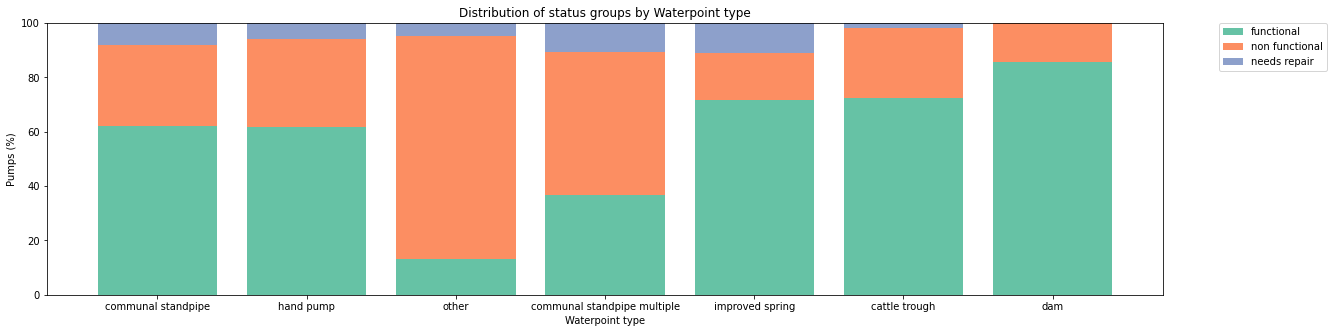

In [ ]:
#other waterpoint types have a low functionality rate
fig, ax = plt.subplots(figsize=(20,5))
labels = waterpoint_type.index
ax.bar(labels, waterpoint_type['perc_functional'], label = 'functional',  color = '#66c2a5')
ax.bar (labels, waterpoint_type['perc_non_functional'], label = 'non functional', bottom = waterpoint_type['perc_functional'] , color = '#fc8e62')
ax.bar(labels, waterpoint_type['perc_functional_needs_repair'], label = 'needs repair', bottom = waterpoint_type['perc_functional'] +waterpoint_type['perc_non_functional'],  color = '#8da0cb')
ax.set(title = 'Distribution of status groups by Waterpoint type', xlabel = 'Waterpoint type', ylabel = 'Pumps (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

The waterpoint type and waterpoint_type_group features are very similar. The communal standpipe group is subdivided into two categories. The communal standpiipe multiple has a much lower functionality rate than the communal standpipe category, so I will keep this feature and combine the low cardinality classes together.